# 🚀 Análise de Dados de Comissionamento e Logística do iFood
 
    Bem-vindo(a)! Este notebook vai te mostrar, de forma simples e visual, como as taxas e custos impactam a rentabilidade dos restaurantes e do próprio iFood

No notebook de analise_historica iremos focar na análise exploratória dos dados que serão importantes para a definição de estratégias para diminuir/aumentar as taxas de comissionamento

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

arquivo = "Base de Dados.xlsx"  
xls = pd.ExcelFile(arquivo)

df = xls.parse("DF")

df[df.columns[0]] = pd.to_datetime(df[df.columns[0]], format="%d/%m/%Y")
df["performance_classification"] = df["performance_classification"].replace("CONTA ESTRATEGICA", "KEY ACCOUNT")
df['delivery_cost'] = df['delivery_cost'].fillna(0)
df['occurrences_cost'] = df['occurrences_cost'].fillna(0)
df

,reference_month,frn_id,group_name,performance_classification,business_model,orders,gmv_basket,delivery_fee,paid_delivery_fee,commission,service_fee,anticipation_fee,olp_fee,delivery_cost,occurrences_cost
0,2024-10-01,1533443,SEM MARCA,LONG TAIL,MARKETPLACE,207,5639.51,182.00,182.00,564.66,96.03,0,95.70,0.000000,0.000000
1,2024-08-01,2897981,SEM MARCA,LONG TAIL,MARKETPLACE,105,9371.00,1072.00,1072.00,1026.12,0.00,0,221.39,0.000000,0.000000
2,2024-09-01,1431197,PYTUDAY,KEY ACCOUNT,MARKETPLACE,1286,84279.58,1707.26,1688.27,6711.43,0.00,0,1371.46,0.000000,0.000000
3,2024-10-01,2828209,SEM MARCA,LONG TAIL,MARKETPLACE,777,57726.88,4366.58,3663.73,6320.22,0.00,0,1358.12,0.000000,-50.870054
4,2024-08-01,2485361,ZAYVPKY,KEY ACCOUNT,FULL_SERVICE,1788,64321.02,12811.12,11510.37,11774.30,770.22,0,1752.40,-12534.485556,-647.336556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128598,2024-09-01,1867858,SEM MARCA,LONG TAIL,FULL_SERVICE,1,29.44,22.99,22.99,0.00,0.00,0,0.00,0.000000,0.000000
128599,2024-09-01,3258593,SEM MARCA,LONG TAIL,FULL_SERVICE,1,35.90,5.99,0.00,8.26,0.00,0,1.15,-7.960000,0.000000
128600,2024-09-01,2916109,SEM MARCA,LONG TAIL,FULL_SERVICE,1,46.00,3.99,0.00,10.58,0.00,0,1.47,-7.040000,0.000000
128601,2024-10-01,3142091,SEM MARCA,LONG TAIL,FULL_SERVICE,1,21.00,3.99,3.99,0.00,0.00,0,0.00,0.000000,0.000000


#### 📊 Cálculo do AOV (Average Order Value)

O **AOV (Average Order Value)** é o valor médio de cada pedido realizado em um restaurante. Ele é um dos principais indicadores para entender o perfil de consumo dos clientes e a estratégia de precificação dos restaurantes.

**Como calcular:**  
AOV = Valor total dos pedidos (`gmv_basket`) dividido pelo número de pedidos (`orders`).

Vamos calcular o AOV para cada restaurante da base:

#### 🏷️ Classificação dos Restaurantes por Faixa de AOV

Para facilitar a análise, classifiquei os restaurantes em três grupos de acordo com o AOV:
- **Baixo**: AOV abaixo do primeiro quartil (25%)
- **Médio**: AOV entre o primeiro e o terceiro quartil (25% a 75%)
- **Alto**: AOV acima do terceiro quartil (75%)

Assim, consigo identificar rapidamente quais restaurantes têm ticket médio mais alto ou mais baixo em relação ao restante da base.

In [5]:
df['aov'] = df['gmv_basket'] / df['orders']

q1 = df['aov'].quantile(0.25)
q3 = df['aov'].quantile(0.75)

df['aov_classificacao'] = df['aov'].apply(lambda x: "baixo" if x < q1 else ("alto" if x > q3 else "medio"))

df


,reference_month,frn_id,group_name,performance_classification,business_model,orders,gmv_basket,delivery_fee,paid_delivery_fee,commission,service_fee,anticipation_fee,olp_fee,delivery_cost,occurrences_cost,aov,aov_classificacao
0,2024-10-01,1533443,SEM MARCA,LONG TAIL,MARKETPLACE,207,5639.51,182.00,182.00,564.66,96.03,0,95.70,0.000000,0.000000,27.244010,baixo
1,2024-08-01,2897981,SEM MARCA,LONG TAIL,MARKETPLACE,105,9371.00,1072.00,1072.00,1026.12,0.00,0,221.39,0.000000,0.000000,89.247619,alto
2,2024-09-01,1431197,PYTUDAY,KEY ACCOUNT,MARKETPLACE,1286,84279.58,1707.26,1688.27,6711.43,0.00,0,1371.46,0.000000,0.000000,65.536221,alto
3,2024-10-01,2828209,SEM MARCA,LONG TAIL,MARKETPLACE,777,57726.88,4366.58,3663.73,6320.22,0.00,0,1358.12,0.000000,-50.870054,74.294569,alto
4,2024-08-01,2485361,ZAYVPKY,KEY ACCOUNT,FULL_SERVICE,1788,64321.02,12811.12,11510.37,11774.30,770.22,0,1752.40,-12534.485556,-647.336556,35.973725,medio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128598,2024-09-01,1867858,SEM MARCA,LONG TAIL,FULL_SERVICE,1,29.44,22.99,22.99,0.00,0.00,0,0.00,0.000000,0.000000,29.440000,baixo
128599,2024-09-01,3258593,SEM MARCA,LONG TAIL,FULL_SERVICE,1,35.90,5.99,0.00,8.26,0.00,0,1.15,-7.960000,0.000000,35.900000,medio
128600,2024-09-01,2916109,SEM MARCA,LONG TAIL,FULL_SERVICE,1,46.00,3.99,0.00,10.58,0.00,0,1.47,-7.040000,0.000000,46.000000,medio
128601,2024-10-01,3142091,SEM MARCA,LONG TAIL,FULL_SERVICE,1,21.00,3.99,3.99,0.00,0.00,0,0.00,0.000000,0.000000,21.000000,baixo


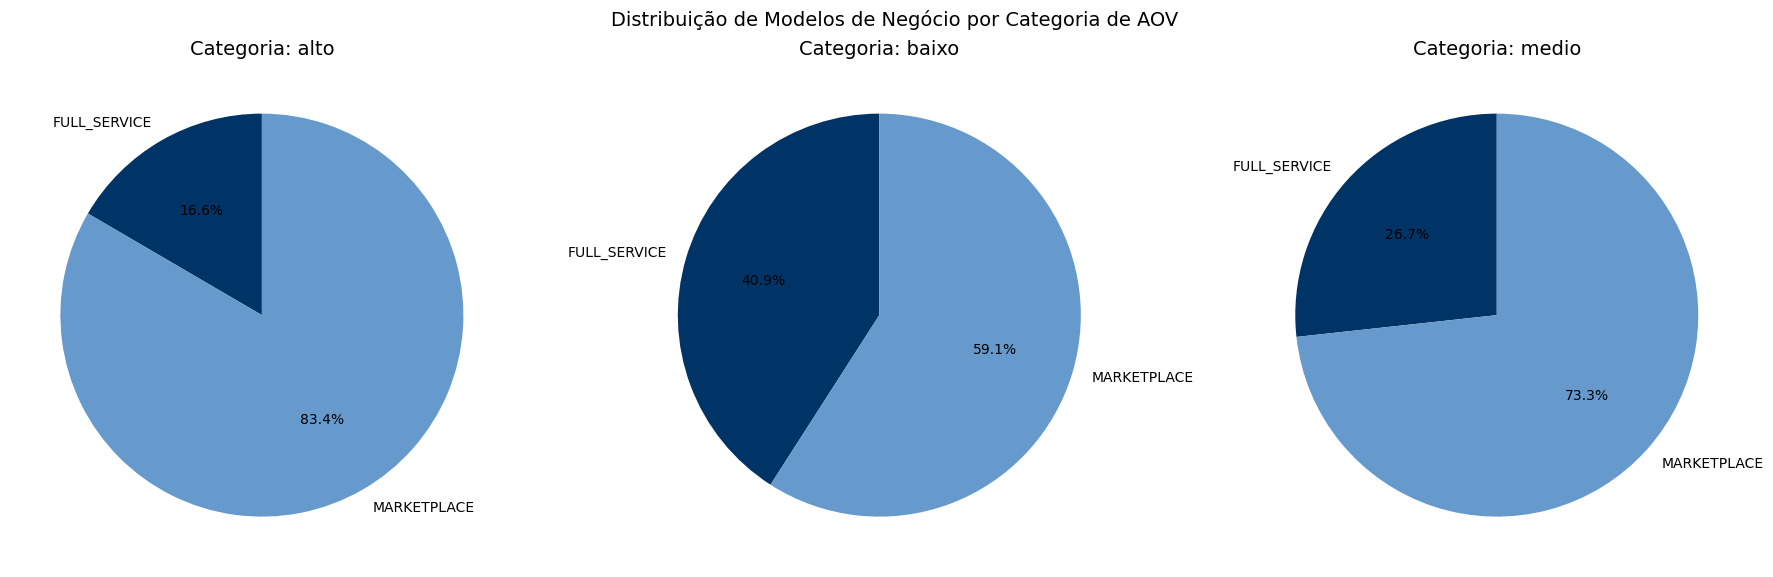

Percentual por categoria de AOV:
business_model     FULL_SERVICE  MARKETPLACE
aov_classificacao                           
alto                      16.59        83.41
baixo                     40.92        59.08
medio                     26.73        73.27


In [6]:
azul_escuro = '#003366'
azul_claro = '#6699CC'
cores = [azul_escuro, azul_claro]
aov_model_counts = df.groupby(['aov_classificacao', 'business_model']).size().unstack(fill_value=0)
fig, axes = plt.subplots(1, len(aov_model_counts.index), figsize=(18, 6))

for ax, (categoria, row) in zip(axes, aov_model_counts.iterrows()):
  row.plot(kind='pie', autopct='%1.1f%%', colors=cores, ax=ax, startangle=90)
  ax.set_title(f'Categoria: {categoria}', fontsize=14)
  ax.set_ylabel('') 

plt.suptitle('Distribuição de Modelos de Negócio por Categoria de AOV', fontsize=14)
plt.tight_layout()
plt.show()

percentages = pd.crosstab(df['aov_classificacao'], df['business_model'], normalize='index') * 100
print("Percentual por categoria de AOV:")
print(percentages.round(2))

- 💰 Receita do iFood
> **O que é**: Valor total que o iFood recebe de cada pedido  
> **Por que importa**: Representa a monetização direta da plataforma por pedido

> **Calcular a receita líquida e bruta**
- Receita Bruta: Para entender o volume total de monetização
- Receita Líquida: Para decisões estratégicas sobre redução de comissão
- Margem: Para avaliar eficiência operacional


In [7]:
def calc_receita_bruta(row):
    """
    Receita Bruta = Todo o dinheiro que ENTRA para o iFood
    """
    if row['business_model'] == "FULL_SERVICE":
        return (row['commission'] + row['service_fee'] + row['anticipation_fee'] +
                row['olp_fee'] + row['paid_delivery_fee'])
    else:  # MARKETPLACE
        return (row['commission'] + row['service_fee'] + row['anticipation_fee'] + row['paid_delivery_fee'] +
                row['olp_fee'])

def calc_receita_liquida(row):
    """
    Receita Líquida = Receita Bruta - Custos Operacionais
    """
    if row['business_model'] == "FULL_SERVICE":
        return (row['commission'] + row['service_fee'] + row['anticipation_fee'] +
                row['olp_fee'] + row['paid_delivery_fee'] + 
                row['delivery_cost'] + row['occurrences_cost'])  
    else:  
        return (row['commission'] + row['service_fee'] + row['anticipation_fee'] + 
                row['olp_fee'] + row['delivery_cost'] + row['occurrences_cost'] + row['paid_delivery_fee'])  


df['receita_bruta_ifood'] = df.apply(calc_receita_bruta, axis=1)
df['receita_liquida_ifood'] = df.apply(calc_receita_liquida, axis=1)

receita_bruta_total = df['receita_bruta_ifood'].sum()
receita_liquida_total = df['receita_liquida_ifood'].sum()

print(f"Receita Bruta Total: R$ {receita_bruta_total:,.2f}")
print(f"Receita Líquida Total: R$ {receita_liquida_total:,.2f}")

Receita Bruta Total: R$ 178,568,981.62
Receita Líquida Total: R$ 156,560,224.55


In [8]:
df['margem_percentual'] = np.where(
    df['receita_bruta_ifood'] != 0,
    (df['receita_liquida_ifood'] / df['receita_bruta_ifood']) * 100,
    0  
)
margem_percentual_model = df.groupby('business_model')['margem_percentual'].mean().reset_index()
print("\nMargem percentual média por modelo de negócio:")
print(margem_percentual_model.round(2))


Margem percentual média por modelo de negócio:
  business_model  margem_percentual
0   FULL_SERVICE              38.59
1    MARKETPLACE              97.26


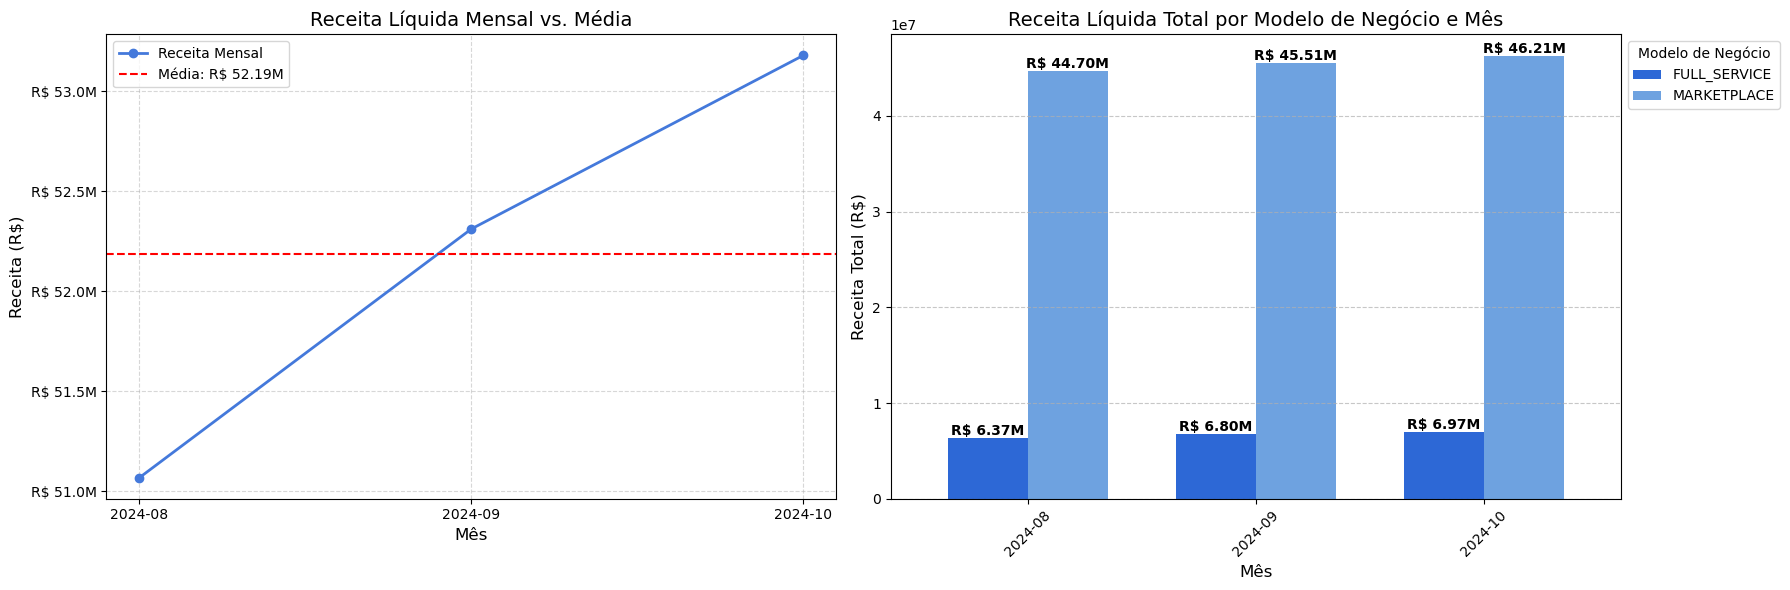

Média de receita mensal: R$ 52,186,741.52
Total de receita: R$ 156,560,224.55

Receita total por modelo de negócio (em milhões de R$):
business_model   FULL_SERVICE  MARKETPLACE
reference_month                           
2024-08              6.365831    44.703438
2024-09              6.803331    45.508566
2024-10              6.967742    46.211317


In [9]:
from matplotlib.ticker import FuncFormatter
azul_escuro = "#2D68D6"
azul_claro = "#6EA2E0"
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

receita_mensal = df.groupby(df['reference_month'].dt.to_period('M'))['receita_liquida_ifood'].sum()

media_receita_mensal = receita_mensal.mean()

ax1.plot(receita_mensal.index.astype(str), receita_mensal.values, marker='o', 
     linewidth=2, color="#4479DB", label='Receita Mensal')
ax1.axhline(y=media_receita_mensal, color='red', linestyle='--', 
      label=f'Média: R$ {media_receita_mensal/1e6:.2f}M')
ax1.set_title('Receita Líquida Mensal vs. Média', fontsize=14)
ax1.set_xlabel('Mês', fontsize=12)
ax1.set_ylabel('Receita (R$)', fontsize=12)
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.5)

formatter = FuncFormatter(lambda x, pos: f'R$ {x/1e6:.1f}M')
ax1.yaxis.set_major_formatter(formatter)

receita_por_modelo = df.groupby([df['reference_month'].dt.to_period('M'), 'business_model'])['receita_liquida_ifood'].sum().unstack()
receita_por_modelo.index = receita_por_modelo.index.astype(str)

receita_por_modelo.plot(kind='bar', ax=ax2, width=0.7, color=[azul_escuro, azul_claro])
ax2.set_title('Receita Líquida Total por Modelo de Negócio e Mês', fontsize=14)
ax2.set_xlabel('Mês', fontsize=12)
ax2.set_ylabel('Receita Total (R$)', fontsize=12)
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', linestyle='--', alpha=0.7)
ax2.legend(title='Modelo de Negócio', loc='upper left', bbox_to_anchor=(1, 1))

for patch in ax2.patches:
  height = patch.get_height()
  ax2.text(
    patch.get_x() + patch.get_width() / 2,
    height,
    f'R$ {height/1e6:.2f}M',
    ha='center', va='bottom', fontsize=10, fontweight='bold'
  )

plt.tight_layout()
plt.show()

print(f"Média de receita mensal: R$ {media_receita_mensal:,.2f}")
print(f"Total de receita: R$ {df['receita_liquida_ifood'].sum():,.2f}")

print("\nReceita total por modelo de negócio (em milhões de R$):")
print(receita_por_modelo / 1e6)


In [10]:
df_temporal = df.copy()
df_temporal['ano_mes'] = df_temporal['reference_month'].dt.to_period('M')
df_temporal['ano'] = df_temporal['reference_month'].dt.year
df_temporal['mes'] = df_temporal['reference_month'].dt.month
df_temporal['semana_ano'] = df_temporal['reference_month'].dt.isocalendar().week

print(f"Período analisado: {df_temporal['ano_mes'].min()} a {df_temporal['ano_mes'].max()}")
print(f"Total de meses: {df_temporal['ano_mes'].nunique()}")
print(f"Total de registros: {len(df_temporal):,}")

Período analisado: 2024-08 a 2024-10
Total de meses: 3
Total de registros: 128,603


- 💰 Comissão Média
> **O que é**: Valor médio de comissão 

> **Por que importa**: Representa quanto os restaurantes estão pagando ao iFood

> **Fórmula**: comission / gmv_basket * 100 (Para saber a taxa) 

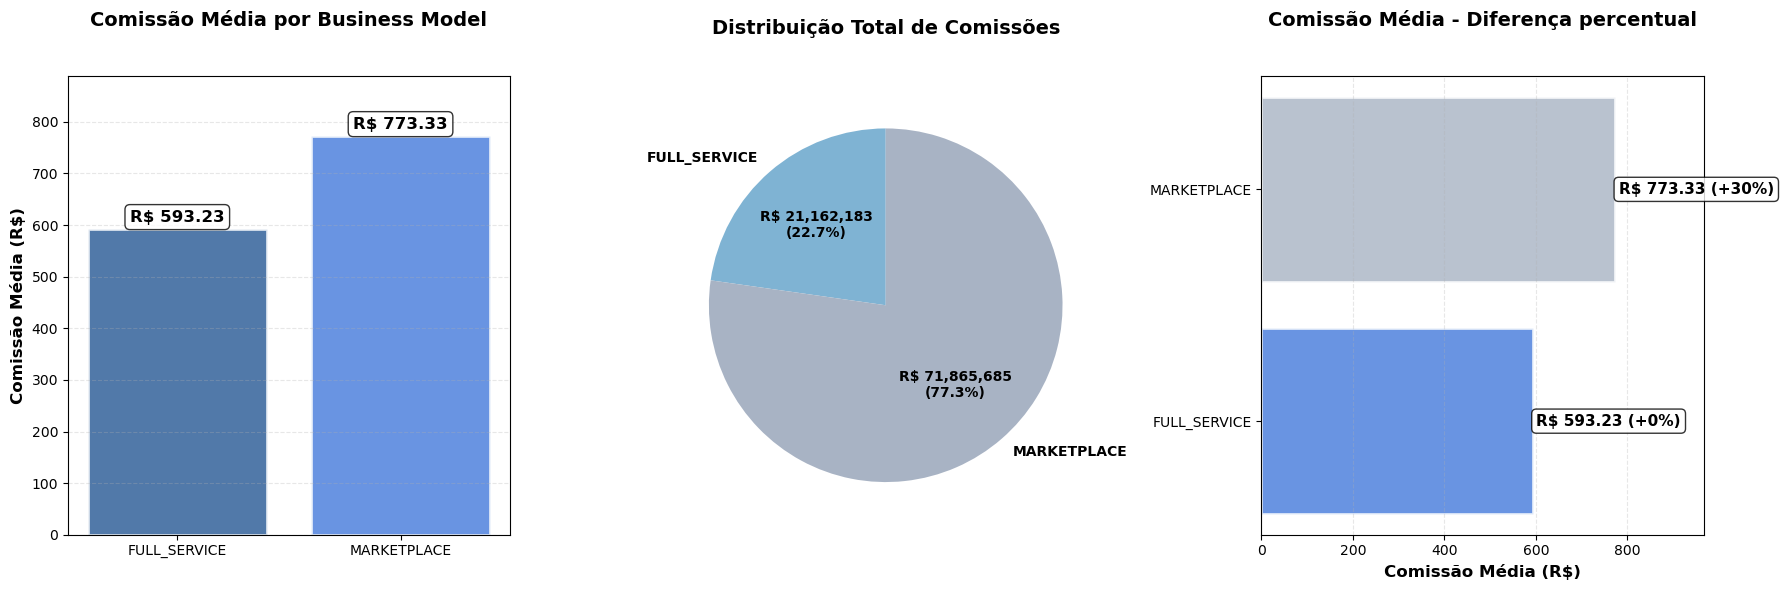

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
paleta_azul_cinza = {
    'azul_escuro': '#255794',
    'azul_medio': '#4479DB',
    'azul_claro': '#7FB3D3',
    'cinza_azulado': '#A8B3C4'
}
ax1 = axes[0]
comissao_media = df.groupby('business_model')['commission'].mean()
bars1 = ax1.bar(comissao_media.index, comissao_media.values, 
                color=[paleta_azul_cinza['azul_escuro'], paleta_azul_cinza['azul_medio']], 
                alpha=0.8, edgecolor='white', linewidth=2)

for bar, value in zip(bars1, comissao_media.values):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + max(comissao_media.values) * 0.01,
             f'R$ {value:.2f}', ha='center', va='bottom', 
             fontweight='bold', fontsize=12,
             bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

ax1.set_title('Comissão Média por Business Model\n', 
              fontsize=14, fontweight='bold', pad=20)
ax1.set_ylabel('Comissão Média (R$)', fontsize=12, fontweight='bold')
ax1.grid(axis='y', linestyle='--', alpha=0.3)
ax1.set_ylim(0, max(comissao_media.values) * 1.15)

ax2 = axes[1]
comissao_total = df.groupby('business_model')['commission'].sum()
colors = [paleta_azul_cinza['azul_claro'], paleta_azul_cinza['cinza_azulado']]
wedges, texts, autotexts = ax2.pie(comissao_total.values, labels=comissao_total.index, 
                                   autopct=lambda pct: f'R$ {comissao_total.sum() * pct/100:,.0f}\n({pct:.1f}%)',
                                   colors=colors, startangle=90, 
                                   textprops={'fontsize': 10, 'fontweight': 'bold'})
ax2.set_title('Distribuição Total de Comissões\n', 
              fontsize=14, fontweight='bold', pad=20)

ax3 = axes[2]
y_pos = range(len(comissao_media))
bars_h = ax3.barh(y_pos, comissao_media.values, 
                   color=[paleta_azul_cinza['azul_medio'], paleta_azul_cinza['cinza_azulado']], 
                   alpha=0.8, edgecolor='white', linewidth=2)

for i, (bar, value) in enumerate(zip(bars_h, comissao_media.values)):
    width = bar.get_width()
    diff_pct = ((value / comissao_media.min() - 1) * 100)
    ax3.text(width + max(comissao_media.values) * 0.01, bar.get_y() + bar.get_height()/2.,
             f'R$ {value:.2f} ({diff_pct:+.0f}%)', 
             ha='left', va='center', fontweight='bold', fontsize=11,
             bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

ax3.set_yticks(y_pos)
ax3.set_yticklabels(comissao_media.index)
ax3.set_xlabel('Comissão Média (R$)', fontsize=12, fontweight='bold')
ax3.set_title('Comissão Média - Diferença percentual\n', 
              fontsize=14, fontweight='bold', pad=20)
ax3.grid(axis='x', linestyle='--', alpha=0.3)
ax3.set_xlim(0, max(comissao_media.values) * 1.25)

plt.tight_layout()
plt.show()


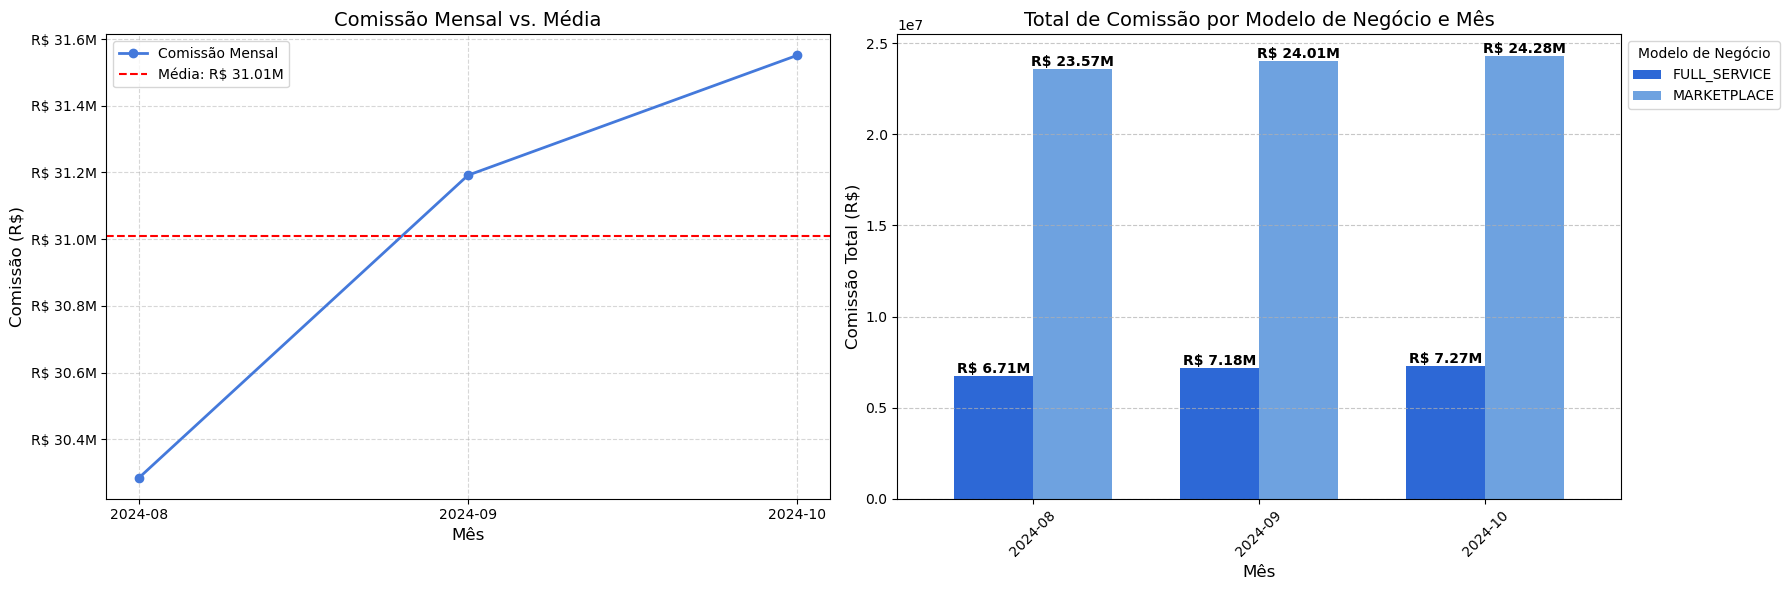

Média de comissão mensal: R$ 31,009,289.95
Total de comissão: R$ 93,027,869.86

Comissão total por modelo de negócio (em milhões de R$):
business_model   FULL_SERVICE  MARKETPLACE
reference_month                           
2024-08              6.714374    23.570865
2024-09              7.176926    24.014848
2024-10              7.270884    24.279973


In [12]:
from matplotlib.ticker import FuncFormatter

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

comissao_mensal = df.groupby(df['reference_month'].dt.to_period('M'))['commission'].sum()
media_comissao_mensal = comissao_mensal.mean()

ax1.plot(comissao_mensal.index.astype(str), comissao_mensal.values, marker='o', 
     linewidth=2, color="#4479DB", label='Comissão Mensal')
ax1.axhline(y=media_comissao_mensal, color='red', linestyle='--', 
      label=f'Média: R$ {media_comissao_mensal/1e6:.2f}M')
ax1.set_title('Comissão Mensal vs. Média', fontsize=14)
ax1.set_xlabel('Mês', fontsize=12)
ax1.set_ylabel('Comissão (R$)', fontsize=12)
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.5)

formatter = FuncFormatter(lambda x, pos: f'R$ {x/1e6:.1f}M')
ax1.yaxis.set_major_formatter(formatter)

comissao_por_modelo = df.groupby([df['reference_month'].dt.to_period('M'), 'business_model'])['commission'].sum().unstack()
comissao_por_modelo.index = comissao_por_modelo.index.astype(str)

comissao_por_modelo.plot(kind='bar', ax=ax2, width=0.7, color=[azul_escuro, azul_claro])
ax2.set_title('Total de Comissão por Modelo de Negócio e Mês', fontsize=14)
ax2.set_xlabel('Mês', fontsize=12)
ax2.set_ylabel('Comissão Total (R$)', fontsize=12)
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', linestyle='--', alpha=0.7)
ax2.legend(title='Modelo de Negócio', loc='upper left', bbox_to_anchor=(1, 1))

for patch in ax2.patches:
  height = patch.get_height()
  ax2.text(
    patch.get_x() + patch.get_width() / 2,
    height,
    f'R$ {height/1e6:.2f}M',
    ha='center', va='bottom', fontsize=10, fontweight='bold'
  )

plt.tight_layout()
plt.show()

print(f"Média de comissão mensal: R$ {media_comissao_mensal:,.2f}")
print(f"Total de comissão: R$ {df['commission'].sum():,.2f}")

print("\nComissão total por modelo de negócio (em milhões de R$):")
print(comissao_por_modelo / 1e6)


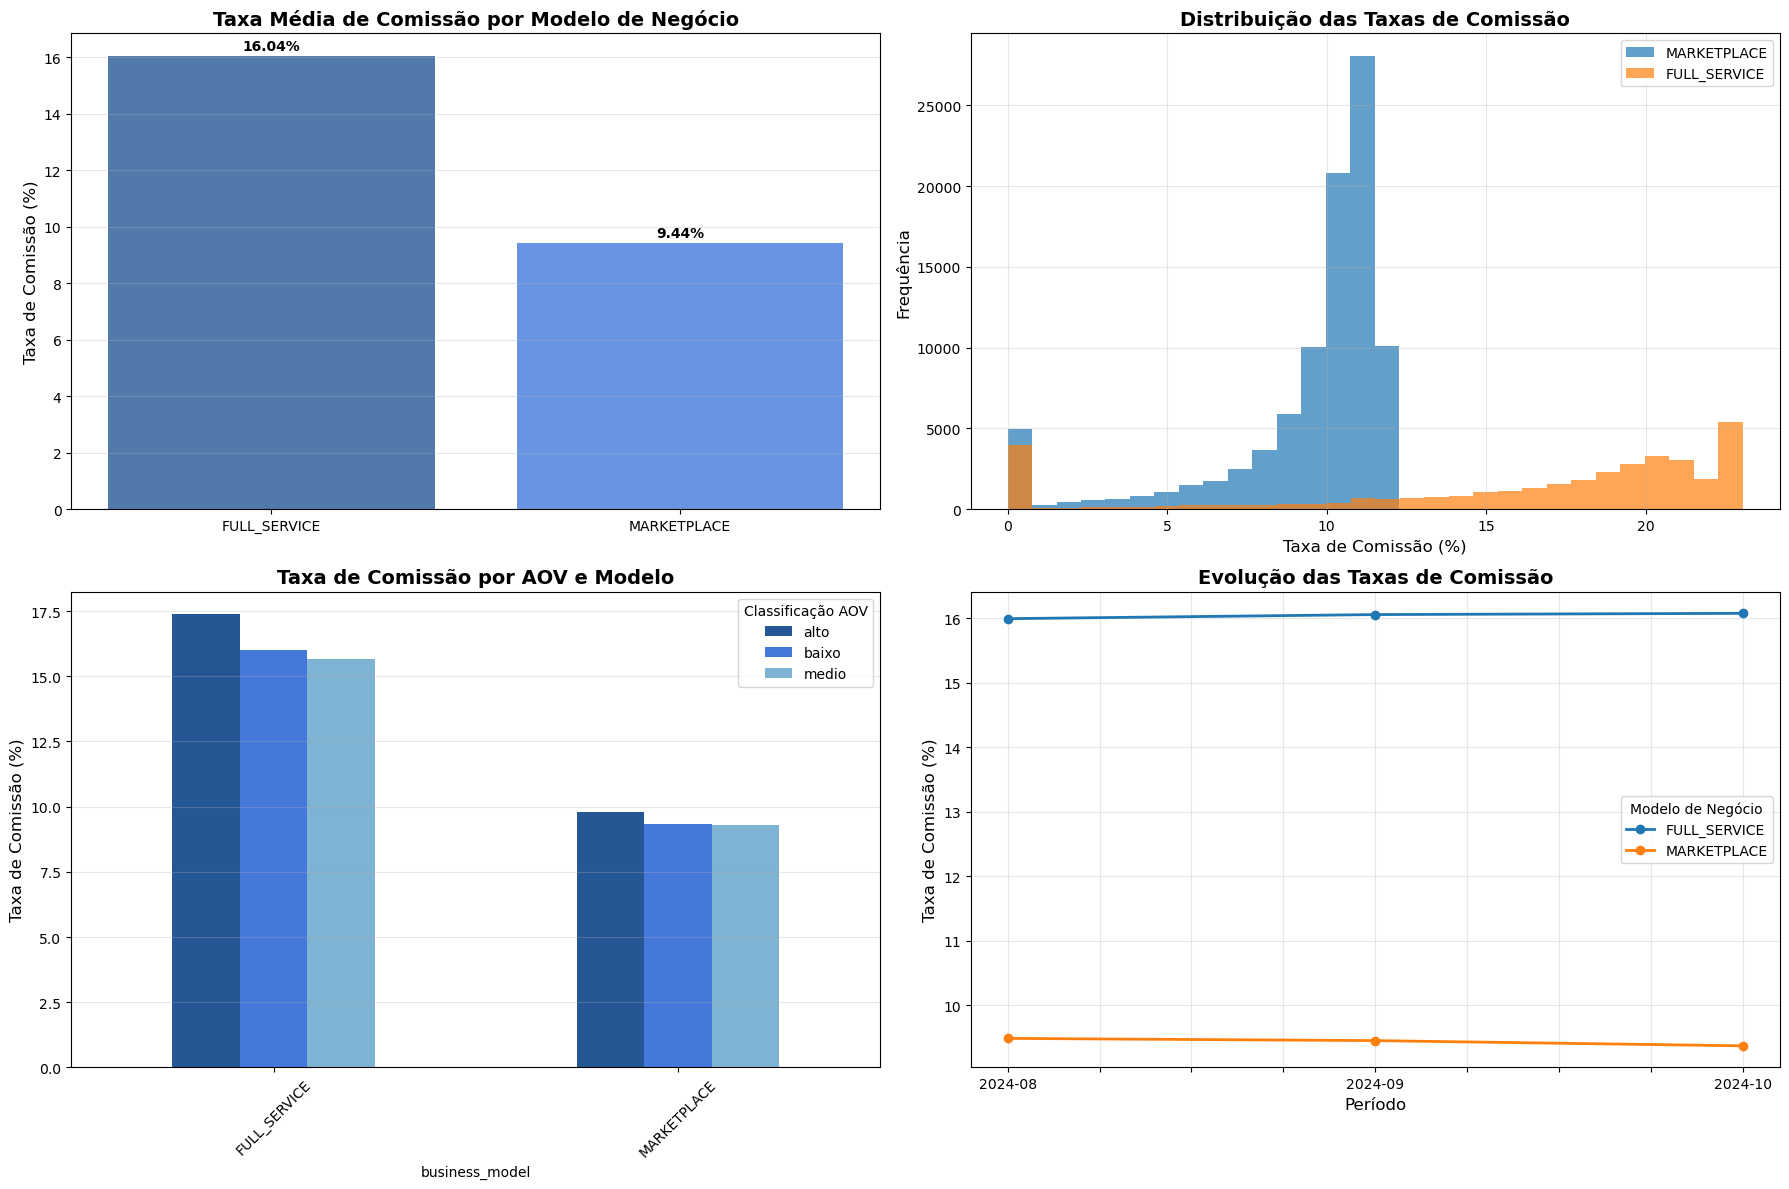

 RESUMO DAS TAXAS DE COMISSÃO:
MARKETPLACE:
  Taxa média: 9.44%
  Taxa mediana: 10.49%
  Desvio padrão: 2.91%

FULL_SERVICE:
  Taxa média: 16.04%
  Taxa mediana: 18.73%
  Desvio padrão: 7.13%

 ANÁLISE DE TAXAS DE COMISSÃO POR MODELO DE NEGÓCIO e AOV:

Modelo: MARKETPLACE
aov_classificacao
alto     9.80
baixo    9.32
medio    9.28
Name: taxa_comissao_pct, dtype: float64

Modelo: FULL_SERVICE
aov_classificacao
alto     17.37
baixo    16.00
medio    15.66
Name: taxa_comissao_pct, dtype: float64


In [13]:
df['taxa_comissao_pct'] = (df['commission'] / df['gmv_basket']) * 100
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
ax1 = axes[0, 0]
taxa_media = df.groupby('business_model')['taxa_comissao_pct'].mean()
bars = ax1.bar(taxa_media.index, taxa_media.values, 
               color=['#255794', '#4479DB'], alpha=0.8)

for bar, value in zip(bars, taxa_media.values):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{value:.2f}%', ha='center', va='bottom', fontweight='bold')

ax1.set_title('Taxa Média de Comissão por Modelo de Negócio', fontsize=14, fontweight='bold')
ax1.set_ylabel('Taxa de Comissão (%)', fontsize=12)
ax1.grid(axis='y', alpha=0.3)
ax2 = axes[0, 1]
for modelo in df['business_model'].unique():
    data = df[df['business_model'] == modelo]['taxa_comissao_pct']
    ax2.hist(data, alpha=0.7, label=modelo, bins=30)

ax2.set_title('Distribuição das Taxas de Comissão', fontsize=14, fontweight='bold')
ax2.set_xlabel('Taxa de Comissão (%)', fontsize=12)
ax2.set_ylabel('Frequência', fontsize=12)
ax2.legend()
ax2.grid(alpha=0.3)
ax3 = axes[1, 0]
taxa_aov = df.groupby(['business_model', 'aov_classificacao'])['taxa_comissao_pct'].mean().unstack()
taxa_aov.plot(kind='bar', ax=ax3, color=['#255794', '#4479DB', '#7FB3D3'])
ax3.set_title('Taxa de Comissão por AOV e Modelo', fontsize=14, fontweight='bold')
ax3.set_ylabel('Taxa de Comissão (%)', fontsize=12)
ax3.tick_params(axis='x', rotation=45)
ax3.legend(title='Classificação AOV')
ax3.grid(axis='y', alpha=0.3)

ax4 = axes[1, 1]
taxa_temporal = df.groupby([df['reference_month'].dt.to_period('M'), 'business_model'])['taxa_comissao_pct'].mean().unstack()
taxa_temporal.index = taxa_temporal.index.astype(str)
taxa_temporal.plot(ax=ax4, marker='o', linewidth=2)
ax4.set_title('Evolução das Taxas de Comissão', fontsize=14, fontweight='bold')
ax4.set_xlabel('Período', fontsize=12)
ax4.set_ylabel('Taxa de Comissão (%)', fontsize=12)
ax4.legend(title='Modelo de Negócio')
ax4.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(" RESUMO DAS TAXAS DE COMISSÃO:")
print("="*50)
for modelo in df['business_model'].unique():
    dados = df[df['business_model'] == modelo]['taxa_comissao_pct']
    print(f"{modelo}:")
    print(f"  Taxa média: {dados.mean():.2f}%")
    print(f"  Taxa mediana: {dados.median():.2f}%")
    print(f"  Desvio padrão: {dados.std():.2f}%")
    print()
    
print(" ANÁLISE DE TAXAS DE COMISSÃO POR MODELO DE NEGÓCIO e AOV:")
for modelo in df['business_model'].unique():
    print(f"\nModelo: {modelo}")
    taxa_aov_modelo = df[df['business_model'] == modelo].groupby('aov_classificacao')['taxa_comissao_pct'].mean()
    print(taxa_aov_modelo.round(2))

C:\Users\Beatriz\AppData\Local\Temp\ipykernel_5812\3218185471.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fs_alto['faixa_comissao'] = pd.qcut(fs_alto['taxa_comissao_pct'],
C:\Users\Beatriz\AppData\Local\Temp\ipykernel_5812\3218185471.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  elasticidade = fs_alto.groupby('faixa_comissao').agg({


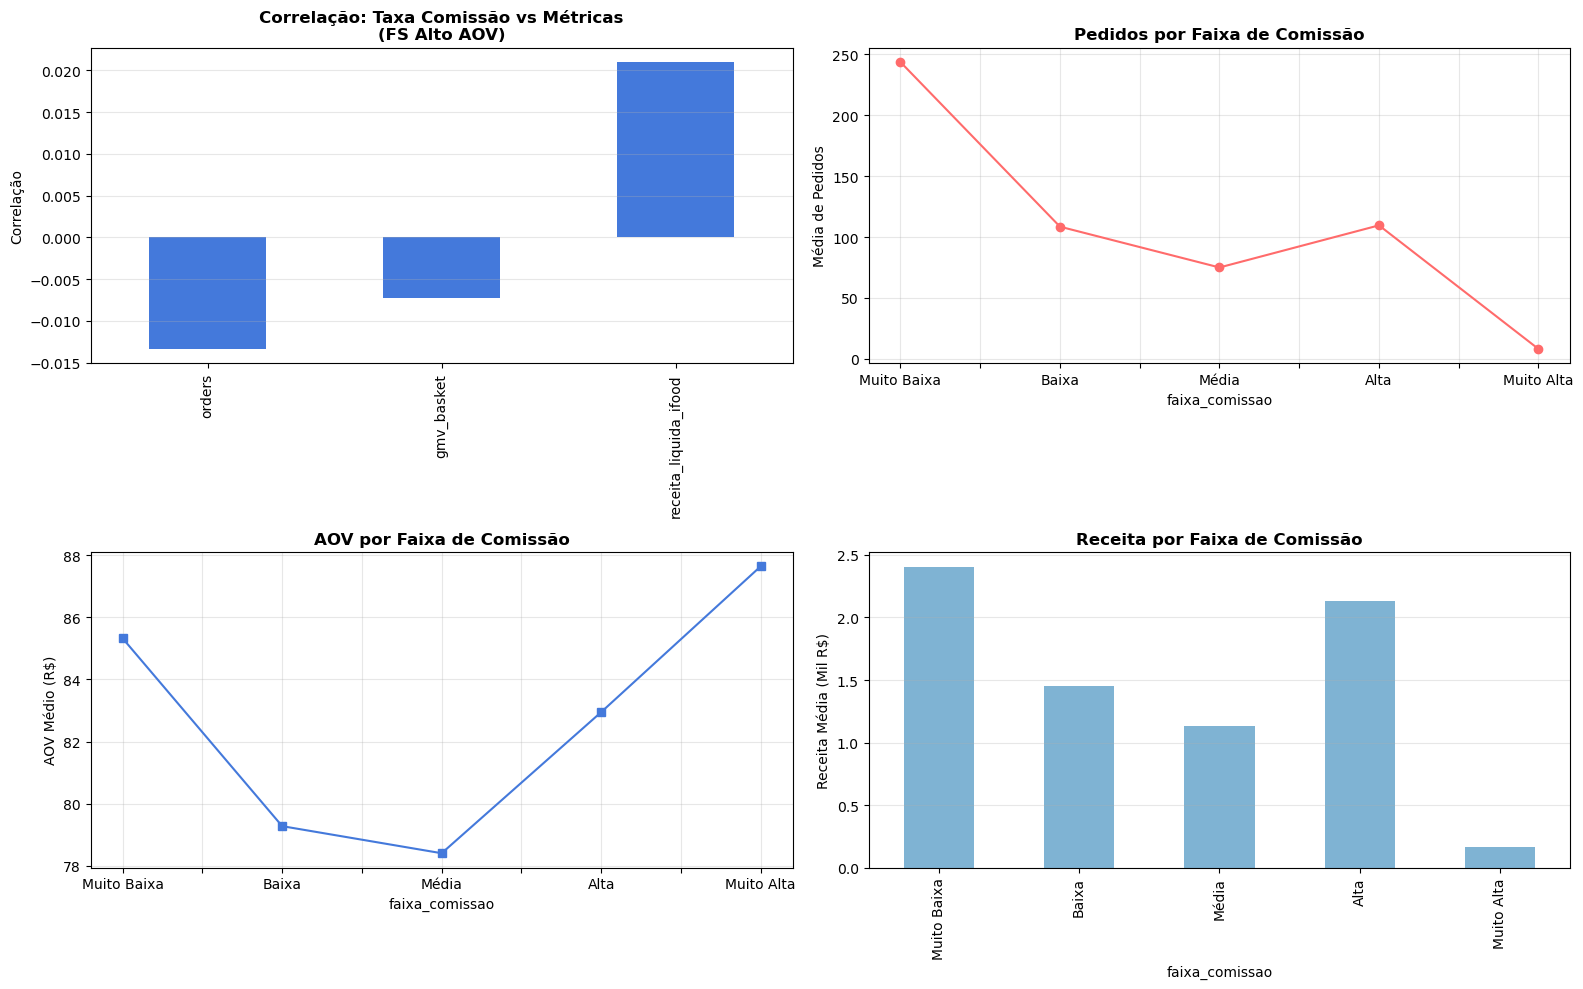

ANÁLISE DE ELASTICIDADE - FS ALTO AOV:
Correlações com Taxa de Comissão:
orders                  -0.013
gmv_basket              -0.007
receita_liquida_ifood    0.021
Name: taxa_comissao_pct, dtype: float64

Performance por Faixa de Comissão:
                orders  gmv_basket  receita_liquida_ifood    aov
faixa_comissao                                                  
Muito Baixa     243.58    16684.77                2403.66  85.32
Baixa           108.49     8226.32                1453.63  79.28
Média            75.00     5465.62                1131.45  78.40
Alta            109.58     9022.98                2128.84  82.95
Muito Alta        8.11      692.07                 167.70  87.64


In [14]:
def analise_elasticidade_fs_alto_aov():
    fs_alto = df[(df['business_model'] == 'FULL_SERVICE') & 
                 (df['aov_classificacao'] == 'alto')]

    correlacoes = fs_alto.groupby('frn_id').agg({
        'taxa_comissao_pct': 'mean',
        'orders': 'sum',
        'gmv_basket': 'sum',
        'receita_liquida_ifood': 'sum'
    }).corr()['taxa_comissao_pct'].drop('taxa_comissao_pct')
    
    fs_alto['faixa_comissao'] = pd.qcut(fs_alto['taxa_comissao_pct'], 
                                        q=5, labels=['Muito Baixa', 'Baixa', 'Média', 'Alta', 'Muito Alta'])
    
    elasticidade = fs_alto.groupby('faixa_comissao').agg({
        'orders': 'mean',
        'gmv_basket': 'mean',
        'receita_liquida_ifood': 'mean',
        'aov': 'mean'
    })
    
    return correlacoes, elasticidade

def plot_elasticidade_fs_alto():
    correlacoes, elasticidade = analise_elasticidade_fs_alto_aov()
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    ax1 = axes[0, 0]
    correlacoes.plot(kind='bar', ax=ax1, color='#4479DB')
    ax1.set_title('Correlação: Taxa Comissão vs Métricas\n(FS Alto AOV)', fontweight='bold')
    ax1.set_ylabel('Correlação')
    ax1.grid(axis='y', alpha=0.3)
    
    ax2 = axes[0, 1]
    elasticidade['orders'].plot(kind='line', marker='o', ax=ax2, color='#FF6B6B')
    ax2.set_title('Pedidos por Faixa de Comissão', fontweight='bold')
    ax2.set_ylabel('Média de Pedidos')
    ax2.grid(alpha=0.3)
    
    ax3 = axes[1, 0]
    elasticidade['aov'].plot(kind='line', marker='s', ax=ax3, color='#4479DB')
    ax3.set_title('AOV por Faixa de Comissão', fontweight='bold')
    ax3.set_ylabel('AOV Médio (R$)')
    ax3.grid(alpha=0.3)
    
    ax4 = axes[1, 1]
    (elasticidade['receita_liquida_ifood']/1000).plot(kind='bar', ax=ax4, color='#7FB3D3')
    ax4.set_title('Receita por Faixa de Comissão', fontweight='bold')
    ax4.set_ylabel('Receita Média (Mil R$)')
    ax4.grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return correlacoes, elasticidade

correlacoes, elasticidade = plot_elasticidade_fs_alto()
print("ANÁLISE DE ELASTICIDADE - FS ALTO AOV:")
print("="*50)
print("Correlações com Taxa de Comissão:")
print(correlacoes.round(3))
print("\nPerformance por Faixa de Comissão:")
print(elasticidade.round(2))

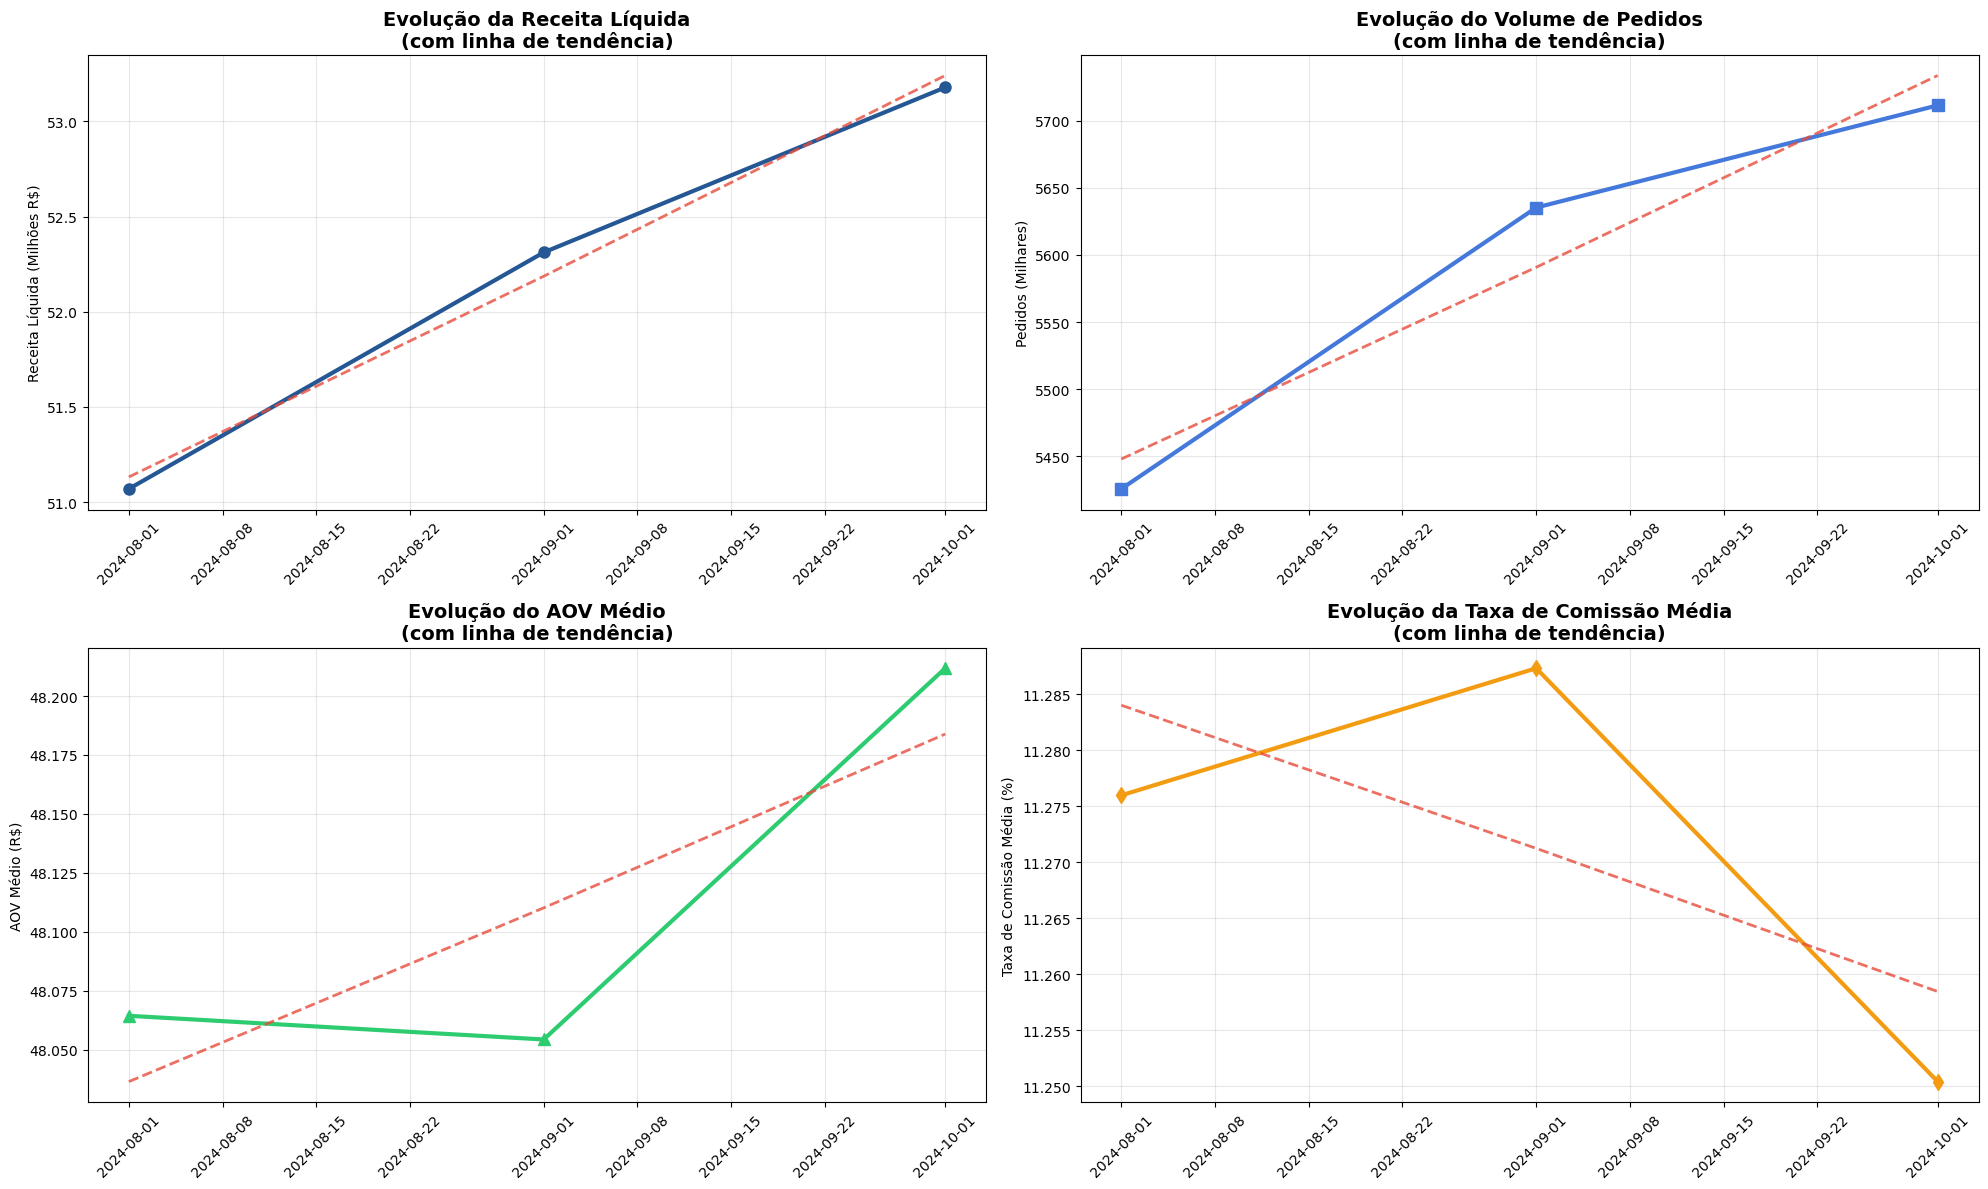

In [15]:
import scipy.stats as stats
cores_ifood = {
    'azul_escuro': '#255794',
    'azul_medio': '#4479DB',
    'azul_claro': '#7FB3D3',
    'verde_sucesso': '#2ECC71',
    'laranja_alerta': '#F39C12',
    'vermelho_principal': '#E74C3C'
}
df['taxa_comissao_pct'] = (df['commission'] / df['gmv_basket']) * 100
df_temporal['taxa_comissao_pct'] = (df_temporal['commission'] / df_temporal['gmv_basket']) * 100
def analisar_tendencias_crescimento():
    metricas_mensais = df_temporal.groupby('ano_mes').agg({
        'receita_liquida_ifood': 'sum',
        'commission': 'sum',
        'orders': 'sum', 
        'gmv_basket': 'sum',
        'frn_id': 'nunique',
        'aov': 'mean',
        'taxa_comissao_pct': 'mean'
    }).reset_index()

    metricas_mensais['data'] = metricas_mensais['ano_mes'].dt.to_timestamp()
    metricas_mensais['mes_numerico'] = range(len(metricas_mensais))
    metricas_mensais['receita_growth'] = metricas_mensais['receita_liquida_ifood'].pct_change() * 100
    metricas_mensais['orders_growth'] = metricas_mensais['orders'].pct_change() * 100
    metricas_mensais['gmv_growth'] = metricas_mensais['gmv_basket'].pct_change() * 100
    metricas_mensais['aov_growth'] = metricas_mensais['aov'].pct_change() * 100
    
    # Calcular tendências usando regressão linear
    def calcular_tendencia(serie_temporal, x_values):
        # Remover NaN
        mask = ~np.isnan(serie_temporal)
        if mask.sum() < 2:
            return 0, 0, 0
            
        y_clean = serie_temporal[mask]
        x_clean = x_values[mask]
        slope, intercept, r_value, p_value, std_err = stats.linregress(x_clean, y_clean)
        
        return slope, r_value**2, p_value

    tendencias = {}
    x_values = metricas_mensais['mes_numerico'].values
    
    metricas_para_analise = {
        'Receita Líquida': metricas_mensais['receita_liquida_ifood'],
        'Comissão': metricas_mensais['commission'],
        'Pedidos': metricas_mensais['orders'],
        'GMV': metricas_mensais['gmv_basket'],
        'Restaurantes Únicos': metricas_mensais['frn_id'],
        'AOV Médio': metricas_mensais['aov'],
        'Taxa Comissão Média': metricas_mensais['taxa_comissao_pct']
    }
    
    for nome_metrica, valores in metricas_para_analise.items():
        slope, r2, p_value = calcular_tendencia(valores.values, x_values)
        tendencias[nome_metrica] = {
            'slope': slope,
            'r2': r2,
            'p_value': p_value,
            'significante': p_value < 0.05,
            'tendencia': 'Crescente' if slope > 0 else 'Decrescente'
        }
    
    return metricas_mensais, tendencias

metricas_mensais, tendencias = analisar_tendencias_crescimento()

fig, axes = plt.subplots(2, 2, figsize=(20, 12))
ax1 = axes[0, 0]
ax1.plot(metricas_mensais['data'], metricas_mensais['receita_liquida_ifood']/1e6, 
         marker='o', linewidth=3, color=cores_ifood['azul_escuro'], markersize=8)

z = np.polyfit(metricas_mensais['mes_numerico'], metricas_mensais['receita_liquida_ifood']/1e6, 1)
p = np.poly1d(z)
ax1.plot(metricas_mensais['data'], p(metricas_mensais['mes_numerico']), 
         linestyle='--', color=cores_ifood['vermelho_principal'], linewidth=2, alpha=0.8)

ax1.set_title('Evolução da Receita Líquida\n(com linha de tendência)', fontsize=14, fontweight='bold')
ax1.set_ylabel('Receita Líquida (Milhões R$)')
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', rotation=45)
ax2 = axes[0, 1]
ax2.plot(metricas_mensais['data'], metricas_mensais['orders']/1000, 
         marker='s', linewidth=3, color=cores_ifood['azul_medio'], markersize=8)

z2 = np.polyfit(metricas_mensais['mes_numerico'], metricas_mensais['orders']/1000, 1)
p2 = np.poly1d(z2)
ax2.plot(metricas_mensais['data'], p2(metricas_mensais['mes_numerico']), 
         linestyle='--', color=cores_ifood['vermelho_principal'], linewidth=2, alpha=0.8)

ax2.set_title('Evolução do Volume de Pedidos\n(com linha de tendência)', fontsize=14, fontweight='bold')
ax2.set_ylabel('Pedidos (Milhares)')
ax2.grid(True, alpha=0.3)
ax2.tick_params(axis='x', rotation=45)
ax3 = axes[1, 0]
ax3.plot(metricas_mensais['data'], metricas_mensais['aov'], 
         marker='^', linewidth=3, color=cores_ifood['verde_sucesso'], markersize=8)

z3 = np.polyfit(metricas_mensais['mes_numerico'], metricas_mensais['aov'], 1)
p3 = np.poly1d(z3)
ax3.plot(metricas_mensais['data'], p3(metricas_mensais['mes_numerico']), 
         linestyle='--', color=cores_ifood['vermelho_principal'], linewidth=2, alpha=0.8)

ax3.set_title('Evolução do AOV Médio\n(com linha de tendência)', fontsize=14, fontweight='bold')
ax3.set_ylabel('AOV Médio (R$)')
ax3.grid(True, alpha=0.3)
ax3.tick_params(axis='x', rotation=45)
ax4 = axes[1, 1]
ax4.plot(metricas_mensais['data'], metricas_mensais['taxa_comissao_pct'], 
         marker='d', linewidth=3, color=cores_ifood['laranja_alerta'], markersize=8)

z4 = np.polyfit(metricas_mensais['mes_numerico'], metricas_mensais['taxa_comissao_pct'], 1)
p4 = np.poly1d(z4)
ax4.plot(metricas_mensais['data'], p4(metricas_mensais['mes_numerico']), 
         linestyle='--', color=cores_ifood['vermelho_principal'], linewidth=2, alpha=0.8)

ax4.set_title('Evolução da Taxa de Comissão Média\n(com linha de tendência)', fontsize=14, fontweight='bold')
ax4.set_ylabel('Taxa de Comissão Média (%)')
ax4.grid(True, alpha=0.3)
ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

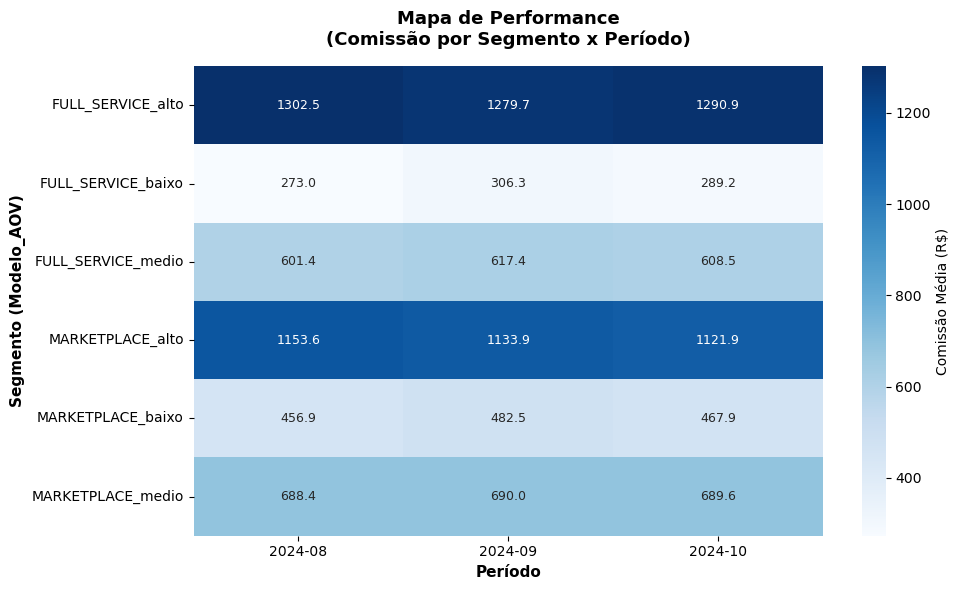

In [16]:
fig, ax4 = plt.subplots(figsize=(10,6))
df['periodo_mes'] = df['reference_month'].dt.to_period('M').astype(str)
periodo_mes = df['periodo_mes']

matriz_performance = df.groupby(['periodo_mes', 'business_model', 'aov_classificacao'])['commission'].mean().reset_index()
matriz_performance['segmento'] = matriz_performance['business_model'] + '_' + matriz_performance['aov_classificacao']

pivot_performance = matriz_performance.pivot_table(
  index='segmento', 
  columns='periodo_mes', 
  values='commission', 
  fill_value=0
)

sns.heatmap(pivot_performance, annot=True, fmt='.1f', cmap='Blues', ax=ax4,
      cbar_kws={'label': 'Comissão Média (R$)'},
      annot_kws={'fontsize': 9})

ax4.set_title('Mapa de Performance\n(Comissão por Segmento x Período)', fontsize=13, fontweight='bold', pad=15)
ax4.set_xlabel('Período', fontsize=11, fontweight='bold')
ax4.set_ylabel('Segmento (Modelo_AOV)', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()


Análise de contribuição para a receita

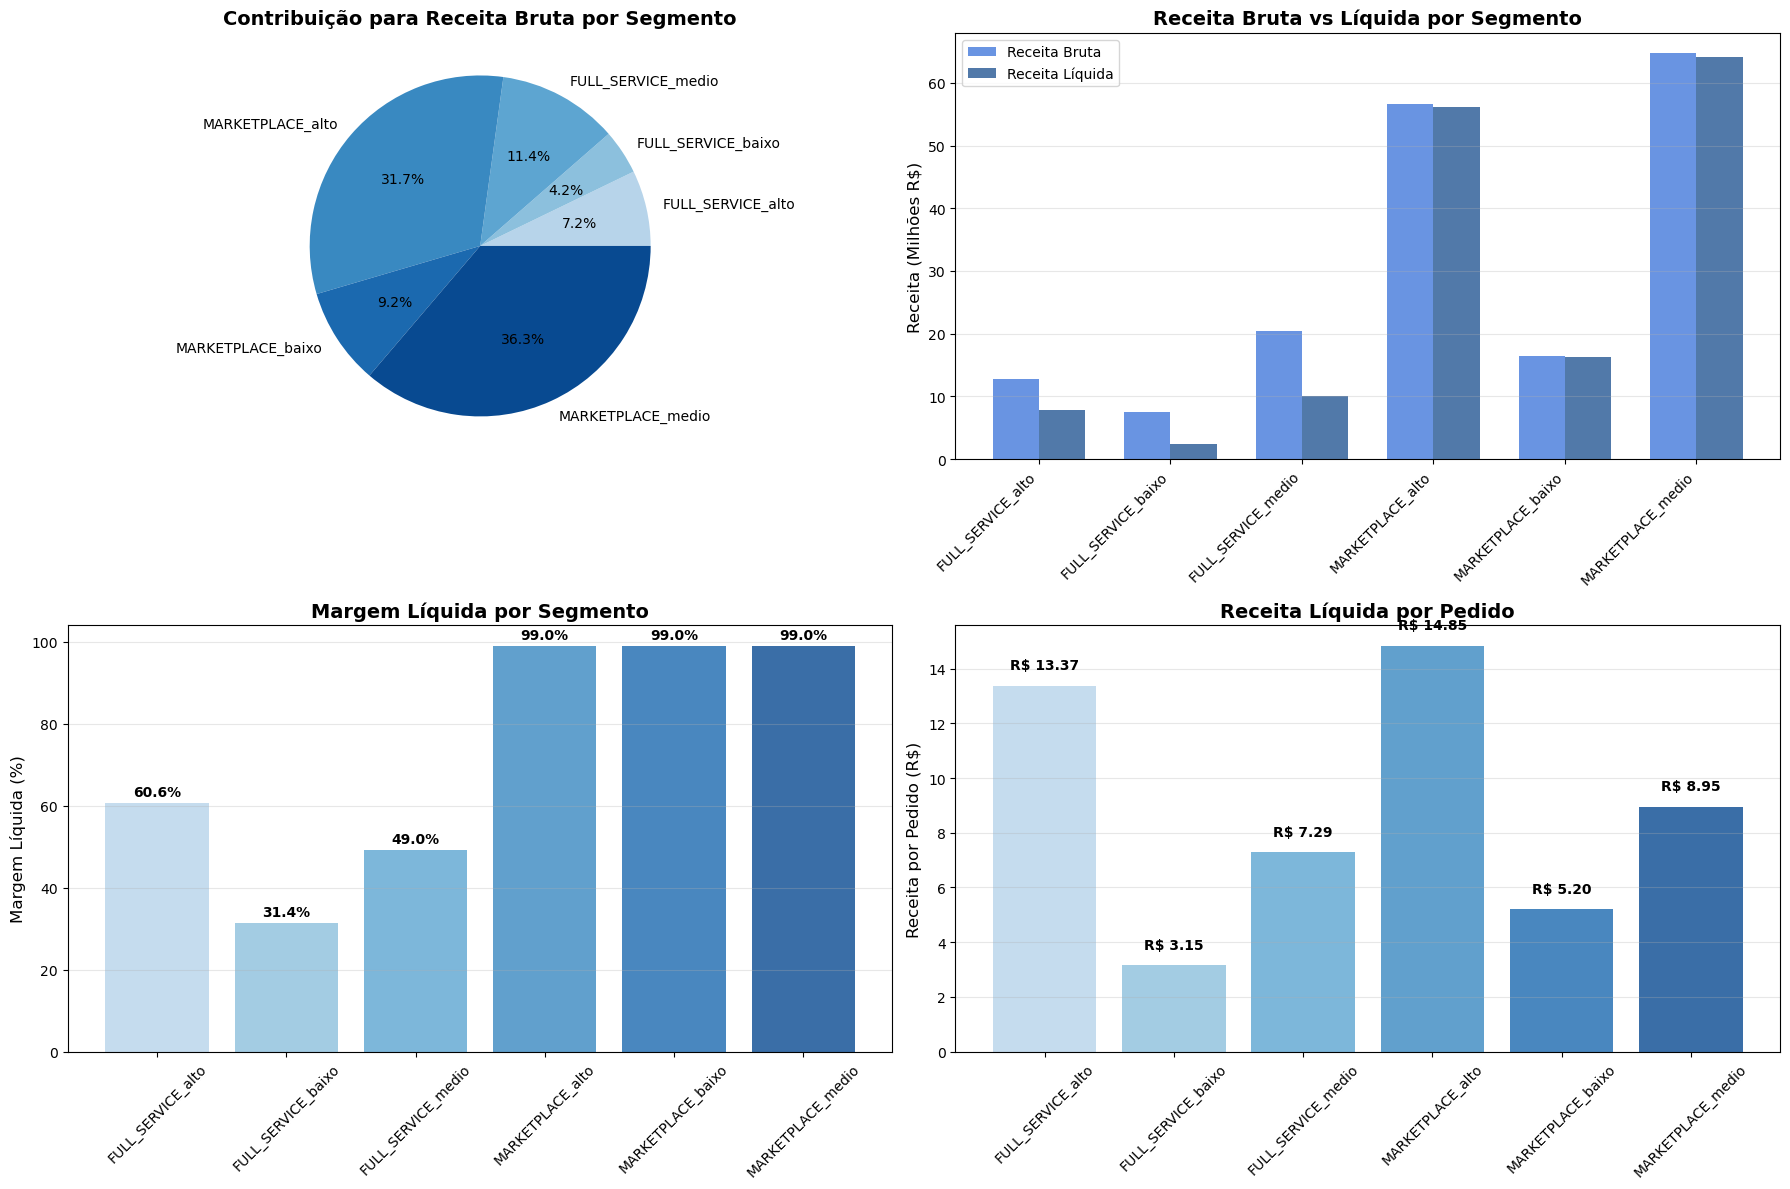

 ANÁLISE DE CONTRIBUIÇÃO POR SEGMENTO:
             segmento  pct_receita_bruta  pct_receita_liquida  \
0   FULL_SERVICE_alto               7.18                 4.96   
1  FULL_SERVICE_baixo               4.24                 1.52   
2  FULL_SERVICE_medio              11.41                 6.38   
3    MARKETPLACE_alto              31.73                35.82   
4   MARKETPLACE_baixo               9.19                10.38   
5   MARKETPLACE_medio              36.25                40.93   

   margem_liquida_pct  receita_por_pedido  
0               60.61               13.37  
1               31.41                3.15  
2               49.04                7.29  
3               98.97               14.85  
4               99.01                5.20  
5               99.00                8.95  


In [17]:
df['segmento'] = df['business_model'] + '_' + df['aov_classificacao']
contribuicao = df.groupby('segmento').agg({
    'receita_bruta_ifood': 'sum',
    'receita_liquida_ifood': 'sum',
    'commission': 'sum',
    'orders': 'sum',
    'gmv_basket': 'sum'
}).reset_index()

contribuicao['pct_receita_bruta'] = (contribuicao['receita_bruta_ifood'] / contribuicao['receita_bruta_ifood'].sum()) * 100
contribuicao['pct_receita_liquida'] = (contribuicao['receita_liquida_ifood'] / contribuicao['receita_liquida_ifood'].sum()) * 100
contribuicao['pct_pedidos'] = (contribuicao['orders'] / contribuicao['orders'].sum()) * 100

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
ax1 = axes[0, 0]
colors = plt.cm.Blues(np.linspace(0.3, 0.9, len(contribuicao)))
wedges, texts, autotexts = ax1.pie(contribuicao['pct_receita_bruta'], 
                                   labels=contribuicao['segmento'],
                                   autopct='%1.1f%%', colors=colors)
ax1.set_title('Contribuição para Receita Bruta por Segmento', fontsize=14, fontweight='bold')
ax2 = axes[0, 1]
x_pos = range(len(contribuicao))
width = 0.35

bars1 = ax2.bar([x - width/2 for x in x_pos], contribuicao['receita_bruta_ifood']/1e6, 
                width, label='Receita Bruta', color='#4479DB', alpha=0.8)
bars2 = ax2.bar([x + width/2 for x in x_pos], contribuicao['receita_liquida_ifood']/1e6, 
                width, label='Receita Líquida', color='#255794', alpha=0.8)

ax2.set_title('Receita Bruta vs Líquida por Segmento', fontsize=14, fontweight='bold')
ax2.set_ylabel('Receita (Milhões R$)', fontsize=12)
ax2.set_xticks(x_pos)
ax2.set_xticklabels(contribuicao['segmento'], rotation=45, ha='right')
ax2.legend()
ax2.grid(axis='y', alpha=0.3)
ax3 = axes[1, 0]
contribuicao['margem_liquida_pct'] = (contribuicao['receita_liquida_ifood'] / contribuicao['receita_bruta_ifood']) * 100

bars = ax3.bar(contribuicao['segmento'], contribuicao['margem_liquida_pct'], 
               color=colors, alpha=0.8)

for bar, value in zip(bars, contribuicao['margem_liquida_pct']):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{value:.1f}%', ha='center', va='bottom', fontweight='bold')

ax3.set_title('Margem Líquida por Segmento', fontsize=14, fontweight='bold')
ax3.set_ylabel('Margem Líquida (%)', fontsize=12)
ax3.tick_params(axis='x', rotation=45)
ax3.grid(axis='y', alpha=0.3)
ax4 = axes[1, 1]
contribuicao['receita_por_pedido'] = contribuicao['receita_liquida_ifood'] / contribuicao['orders']

bars = ax4.bar(contribuicao['segmento'], contribuicao['receita_por_pedido'], 
               color=colors, alpha=0.8)

for bar, value in zip(bars, contribuicao['receita_por_pedido']):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'R$ {value:.2f}', ha='center', va='bottom', fontweight='bold')

ax4.set_title('Receita Líquida por Pedido', fontsize=14, fontweight='bold')
ax4.set_ylabel('Receita por Pedido (R$)', fontsize=12)
ax4.tick_params(axis='x', rotation=45)
ax4.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print(" ANÁLISE DE CONTRIBUIÇÃO POR SEGMENTO:")
print("="*60)
print(contribuicao[['segmento', 'pct_receita_bruta', 'pct_receita_liquida', 
                   'margem_liquida_pct', 'receita_por_pedido']].round(2))

In [ ]:
print("RESUMO - ANÁLISE DE COMISSIONAMENTO")
print("="*70)
total_receita_bruta = df['receita_bruta_ifood'].sum()
total_receita_liquida = df['receita_liquida_ifood'].sum()
margem_geral = (total_receita_liquida / total_receita_bruta) * 100

print(f"RECEITA TOTAL:")
print(f"   Receita Bruta: R$ {total_receita_bruta:,.2f}")
print(f"   Receita Líquida: R$ {total_receita_liquida:,.2f}")
print(f"   Margem Líquida Geral: {margem_geral:.2f}%")
print()
print(f"PERFORMANCE POR MODELO:")
for modelo in df['business_model'].unique():
    dados_modelo = df[df['business_model'] == modelo]
    receita_modelo = dados_modelo['receita_liquida_ifood'].sum()
    participacao = (receita_modelo / total_receita_liquida) * 100
    taxa_media = dados_modelo['taxa_comissao_pct'].mean()
    
    print(f"   {modelo}:")
    print(f"     Participação na receita: {participacao:.1f}%")
    print(f"     Taxa média de comissão: {taxa_media:.2f}%")
    print(f"     Receita líquida: R$ {receita_modelo:,.2f}")
    print()

fs_alto_aov = df[(df['business_model'] == 'FULL_SERVICE') & 
                 (df['aov_classificacao'] == 'alto')]
print(f"SEGMENTO ALVO (FS Alto AOV):" )
print(f"   Número de restaurantes: {fs_alto_aov['frn_id'].nunique()}")
print(f"   Receita líquida: R$ {fs_alto_aov['receita_liquida_ifood'].sum():,.2f}")
print(f"   Participação na receita total: {(fs_alto_aov['receita_liquida_ifood'].sum() / total_receita_liquida) * 100:.1f}%")
print(f"   AOV médio: R$ {fs_alto_aov['aov'].mean():.2f}")
print()

RESUMO - ANÁLISE DE COMISSIONAMENTO
RECEITA TOTAL:
   Receita Bruta: R$ 178,568,981.62
   Receita Líquida: R$ 156,560,224.55
   Margem Líquida Geral: 87.67%

PERFORMANCE POR MODELO:
   MARKETPLACE:
     Participação na receita: 87.1%
     Taxa média de comissão: 9.44%
     Receita líquida: R$ 136,423,320.48

   FULL_SERVICE:
     Participação na receita: 12.9%
     Taxa média de comissão: 16.04%
     Receita líquida: R$ 20,136,904.07

SEGMENTO ALVO (FS Alto AOV):
   Número de restaurantes: 2884
   Receita líquida: R$ 7,768,686.13
   Participação na receita total: 5.0%
   AOV médio: R$ 82.72



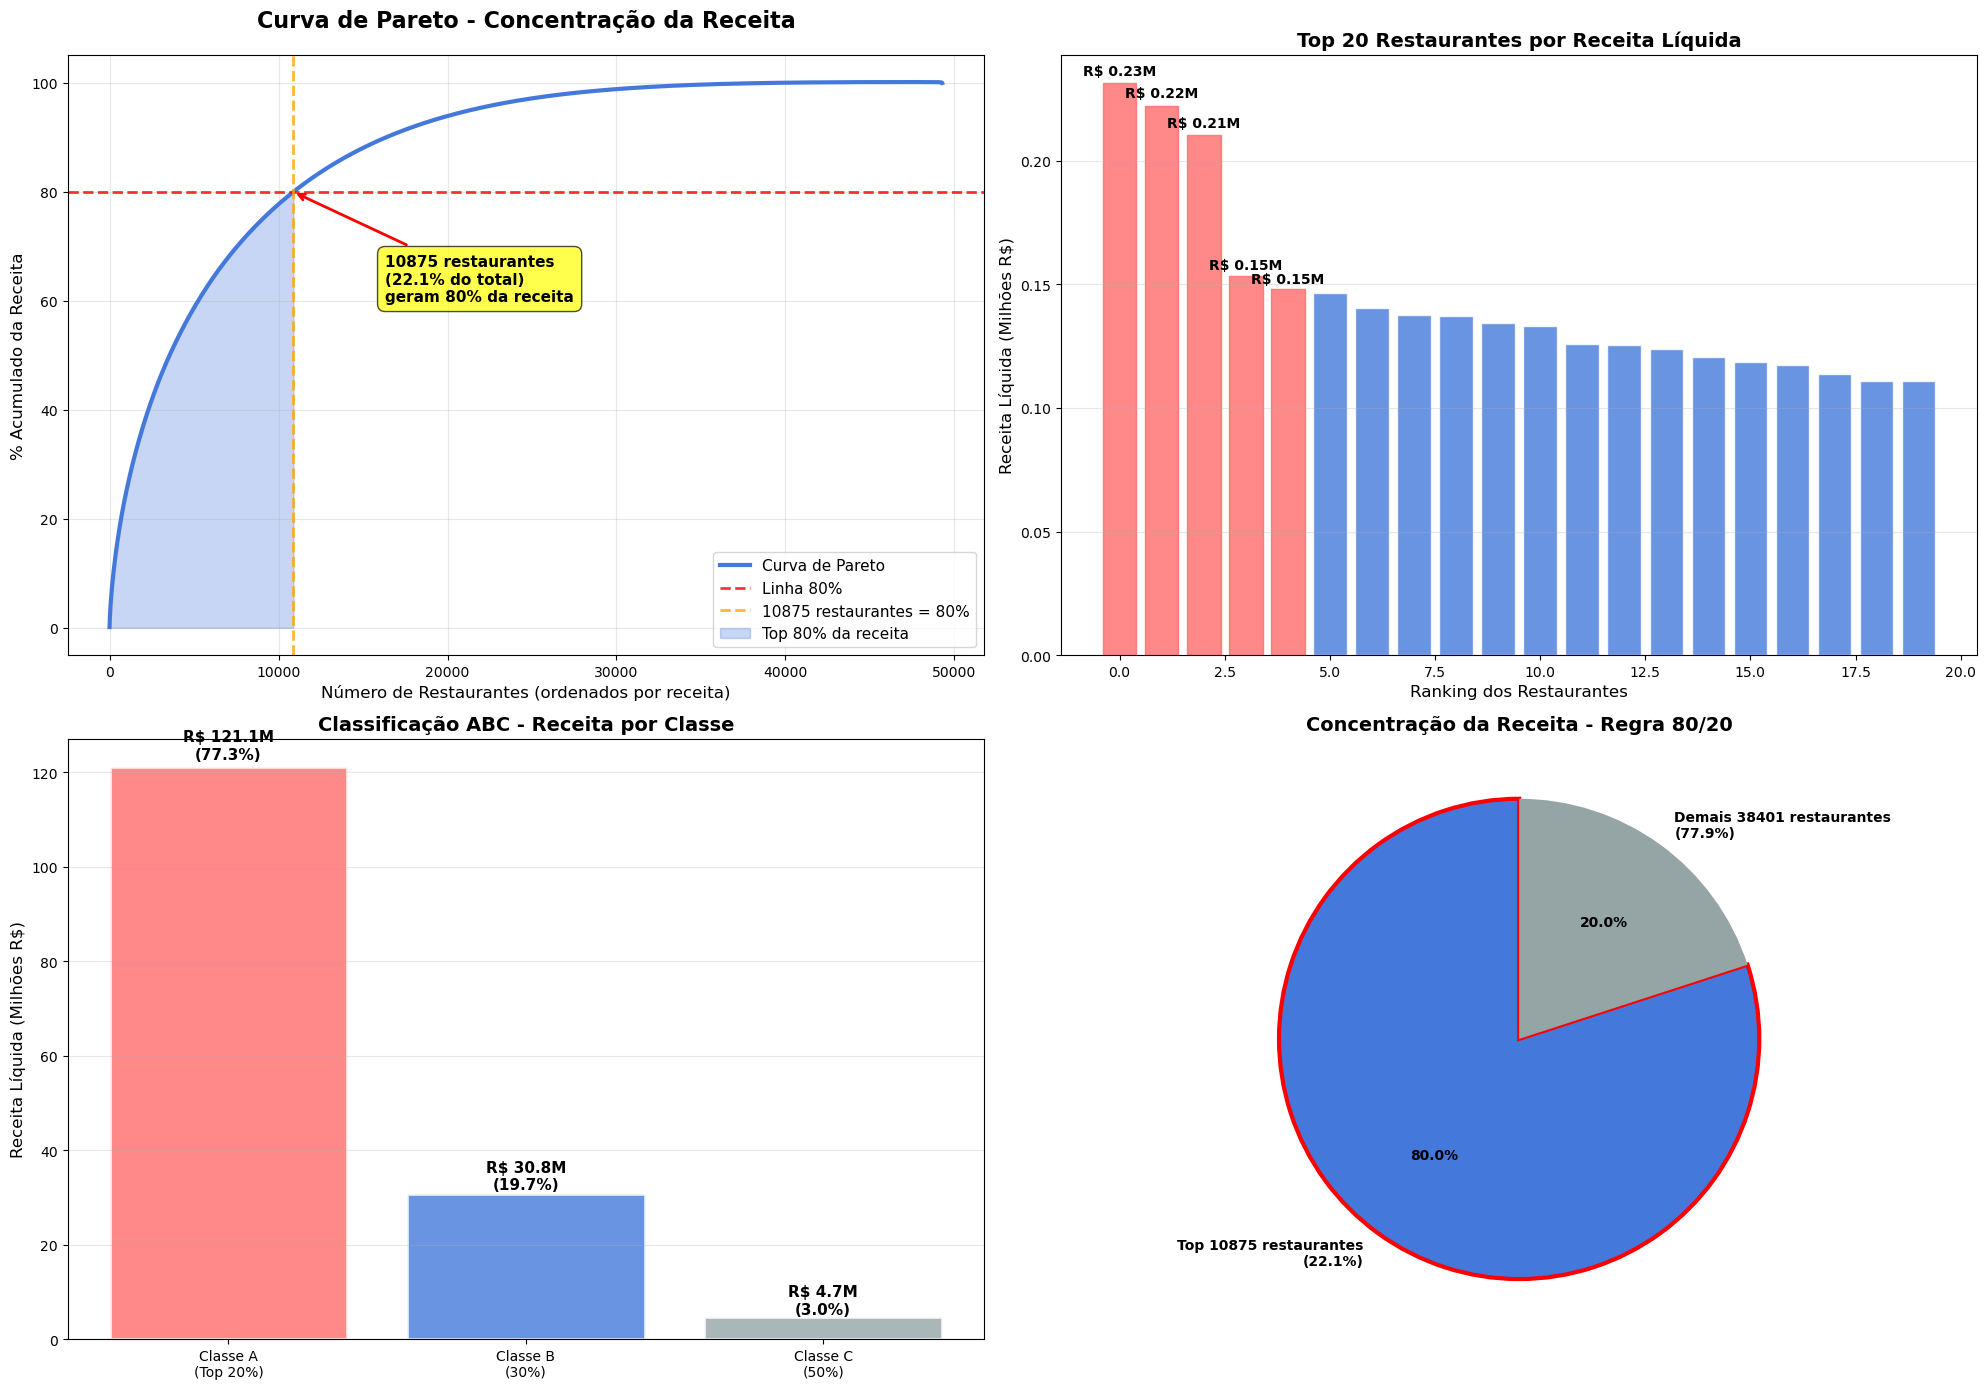

ANÁLISE DE CONCENTRAÇÃO DE RECEITA - CURVA DE PARETO
ESTATÍSTICAS GERAIS:
   Total de restaurantes: 49,276
   Receita total: R$ 156,560,224.55
   Receita média por restaurante: R$ 3,177.21
   Mediana da receita: R$ 764.46

REGRA 80/20:
   10875 restaurantes (22.1%) geram 80% da receita
   Receita dos top 10875: R$ 125,247,452.19
   Receita média dos top 10875: R$ 11,517.01

CLASSIFICAÇÃO ABC:
   Classe A (Top 20% - 9855 restaurantes): R$ 121,094,821.28 (77.3%)
   Classe B (30% - 14782 restaurantes): R$ 30,772,325.57 (19.7%)
   Classe C (50% - 24639 restaurantes): R$ 4,693,077.70 (3.0%)

TOP 10 RESTAURANTES:
--------------------------------------------------
    1º - Restaurante 348,217: R$ 231,296.75 (0.15%)
    2º - Restaurante 1,740,820: R$ 222,298.73 (0.14%)
    3º - Restaurante 304,262: R$ 210,344.64 (0.13%)
    4º - Restaurante 175,936: R$ 153,448.10 (0.10%)
    5º - Restaurante 2,911,858: R$ 148,029.17 (0.09%)
    6º - Restaurante 24,732: R$ 146,522.45 (0.09%)
    7º - Restaurant

In [27]:
def analise_concentracao():
    contrib_restaurantes = df.groupby('frn_id')['receita_liquida_ifood'].sum().sort_values(ascending=False)
    contrib_restaurantes_pct = (contrib_restaurantes / contrib_restaurantes.sum() * 100).cumsum()
    pareto_80 = contrib_restaurantes_pct[contrib_restaurantes_pct <= 80]
    
    return contrib_restaurantes, pareto_80

contrib_restaurantes, pareto_80 = analise_concentracao()

fig, axes = plt.subplots(2, 2, figsize=(20, 14))
ax1 = axes[0, 0]
x_values = range(1, len(contrib_restaurantes) + 1)
contrib_pct_cumsum = (contrib_restaurantes / contrib_restaurantes.sum() * 100).cumsum()
line1 = ax1.plot(x_values, contrib_pct_cumsum.values, 
                 color='#4479DB', linewidth=3, label='Curva de Pareto')

ax1.axhline(y=80, color='red', linestyle='--', linewidth=2, 
            label='Linha 80%', alpha=0.8)

num_rest_80 = len(pareto_80)
ax1.axvline(x=num_rest_80, color='orange', linestyle='--', linewidth=2,
            label=f'{num_rest_80} restaurantes = 80%', alpha=0.8)

ax1.fill_between(x_values[:num_rest_80], 0, contrib_pct_cumsum.values[:num_rest_80], 
                 alpha=0.3, color='#4479DB', label='Top 80% da receita')

ax1.set_title('Curva de Pareto - Concentração da Receita', fontsize=16, fontweight='bold', pad=20)
ax1.set_xlabel('Número de Restaurantes (ordenados por receita)', fontsize=12)
ax1.set_ylabel('% Acumulado da Receita', fontsize=12)
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=11)
ax1.annotate(f'{num_rest_80} restaurantes\n({num_rest_80/len(contrib_restaurantes)*100:.1f}% do total)\ngeram 80% da receita', 
             xy=(num_rest_80, 80), xytext=(num_rest_80*1.5, 60),
             arrowprops=dict(arrowstyle='->', color='red', lw=2),
             fontsize=11, fontweight='bold',
             bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7))
ax2 = axes[0, 1]
top_20 = contrib_restaurantes.head(20)
bars = ax2.bar(range(len(top_20)), top_20.values/1e6, 
               color='#4479DB', alpha=0.8, edgecolor='white', linewidth=1)

ax2.set_title('Top 20 Restaurantes por Receita Líquida', fontsize=14, fontweight='bold')
ax2.set_xlabel('Ranking dos Restaurantes', fontsize=12)
ax2.set_ylabel('Receita Líquida (Milhões R$)', fontsize=12)
ax2.grid(axis='y', alpha=0.3)

for i, bar in enumerate(bars[:5]):
    bar.set_color('#FF6B6B')
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
             f'R$ {height:.2f}M', ha='center', va='bottom', fontweight='bold')

ax3 = axes[1, 0]
total_restaurantes = len(contrib_restaurantes)
classe_A = int(total_restaurantes * 0.2)
classe_B = int(total_restaurantes * 0.3) 
classe_C = total_restaurantes - classe_A - classe_B  

# Receita por classe
receita_A = contrib_restaurantes.iloc[:classe_A].sum()
receita_B = contrib_restaurantes.iloc[classe_A:classe_A+classe_B].sum()
receita_C = contrib_restaurantes.iloc[classe_A+classe_B:].sum()

classes = ['Classe A\n(Top 20%)', 'Classe B\n(30%)', 'Classe C\n(50%)']
receitas = [receita_A/1e6, receita_B/1e6, receita_C/1e6]
cores_abc = ['#FF6B6B', '#4479DB', '#95A5A6']

bars_abc = ax3.bar(classes, receitas, color=cores_abc, alpha=0.8, edgecolor='white', linewidth=2)

ax3.set_title('Classificação ABC - Receita por Classe', fontsize=14, fontweight='bold')
ax3.set_ylabel('Receita Líquida (Milhões R$)', fontsize=12)
ax3.grid(axis='y', alpha=0.3)
total_receita = sum(receitas)
for bar, value in zip(bars_abc, receitas):
    height = bar.get_height()
    percentage = (value / total_receita) * 100
    ax3.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
             f'R$ {value:.1f}M\n({percentage:.1f}%)', 
             ha='center', va='bottom', fontweight='bold', fontsize=11)

ax4 = axes[1, 1]
labels_pizza = [f'Top {num_rest_80} restaurantes\n({num_rest_80/len(contrib_restaurantes)*100:.1f}%)', 
                f'Demais {len(contrib_restaurantes) - num_rest_80} restaurantes\n({(len(contrib_restaurantes) - num_rest_80)/len(contrib_restaurantes)*100:.1f}%)']

receita_80 = contrib_restaurantes.iloc[:num_rest_80].sum()
receita_20 = contrib_restaurantes.iloc[num_rest_80:].sum()
sizes = [receita_80, receita_20]

colors_pizza = ['#4479DB', '#95A5A6']
wedges, texts, autotexts = ax4.pie(sizes, labels=labels_pizza, autopct='%1.1f%%', 
                                   colors=colors_pizza, startangle=90,
                                   textprops={'fontsize': 10, 'fontweight': 'bold'})

ax4.set_title('Concentração da Receita - Regra 80/20', fontsize=14, fontweight='bold')
wedges[0].set_edgecolor('red')
wedges[0].set_linewidth(3)

plt.tight_layout()
plt.show()
print("ANÁLISE DE CONCENTRAÇÃO DE RECEITA - CURVA DE PARETO")
print("="*70)

print(f"ESTATÍSTICAS GERAIS:")
print(f"   Total de restaurantes: {len(contrib_restaurantes):,}")
print(f"   Receita total: R$ {contrib_restaurantes.sum():,.2f}")
print(f"   Receita média por restaurante: R$ {contrib_restaurantes.mean():,.2f}")
print(f"   Mediana da receita: R$ {contrib_restaurantes.median():,.2f}")
print()

print(f"REGRA 80/20:")
print(f"   {num_rest_80} restaurantes ({num_rest_80/len(contrib_restaurantes)*100:.1f}%) geram 80% da receita")
print(f"   Receita dos top {num_rest_80}: R$ {receita_80:,.2f}")
print(f"   Receita média dos top {num_rest_80}: R$ {receita_80/num_rest_80:,.2f}")
print()

print(f"CLASSIFICAÇÃO ABC:")
print(f"   Classe A (Top 20% - {classe_A} restaurantes): R$ {receita_A:,.2f} ({receita_A/contrib_restaurantes.sum()*100:.1f}%)")
print(f"   Classe B (30% - {classe_B} restaurantes): R$ {receita_B:,.2f} ({receita_B/contrib_restaurantes.sum()*100:.1f}%)")
print(f"   Classe C (50% - {classe_C} restaurantes): R$ {receita_C:,.2f} ({receita_C/contrib_restaurantes.sum()*100:.1f}%)")
print()

print(f"TOP 10 RESTAURANTES:")
print("-" * 50)
for i, (frn_id, receita) in enumerate(contrib_restaurantes.head(10).items(), 1):
    pct_total = (receita / contrib_restaurantes.sum()) * 100
    print(f"   {i:2d}º - Restaurante {int(frn_id):,}: R$ {receita:,.2f} ({pct_total:.2f}%)")

print()
print("INSIGHTS ESTRATÉGICOS:")
print("   • Foco nos restaurantes Classe A para maximizar impacto")
print("   • Apenas uma pequena parcela gera a maior parte da receita")
print("   • Estratégias diferenciadas por classe são essenciais")
print("   • Oportunidade de ativação da Classe B e C")

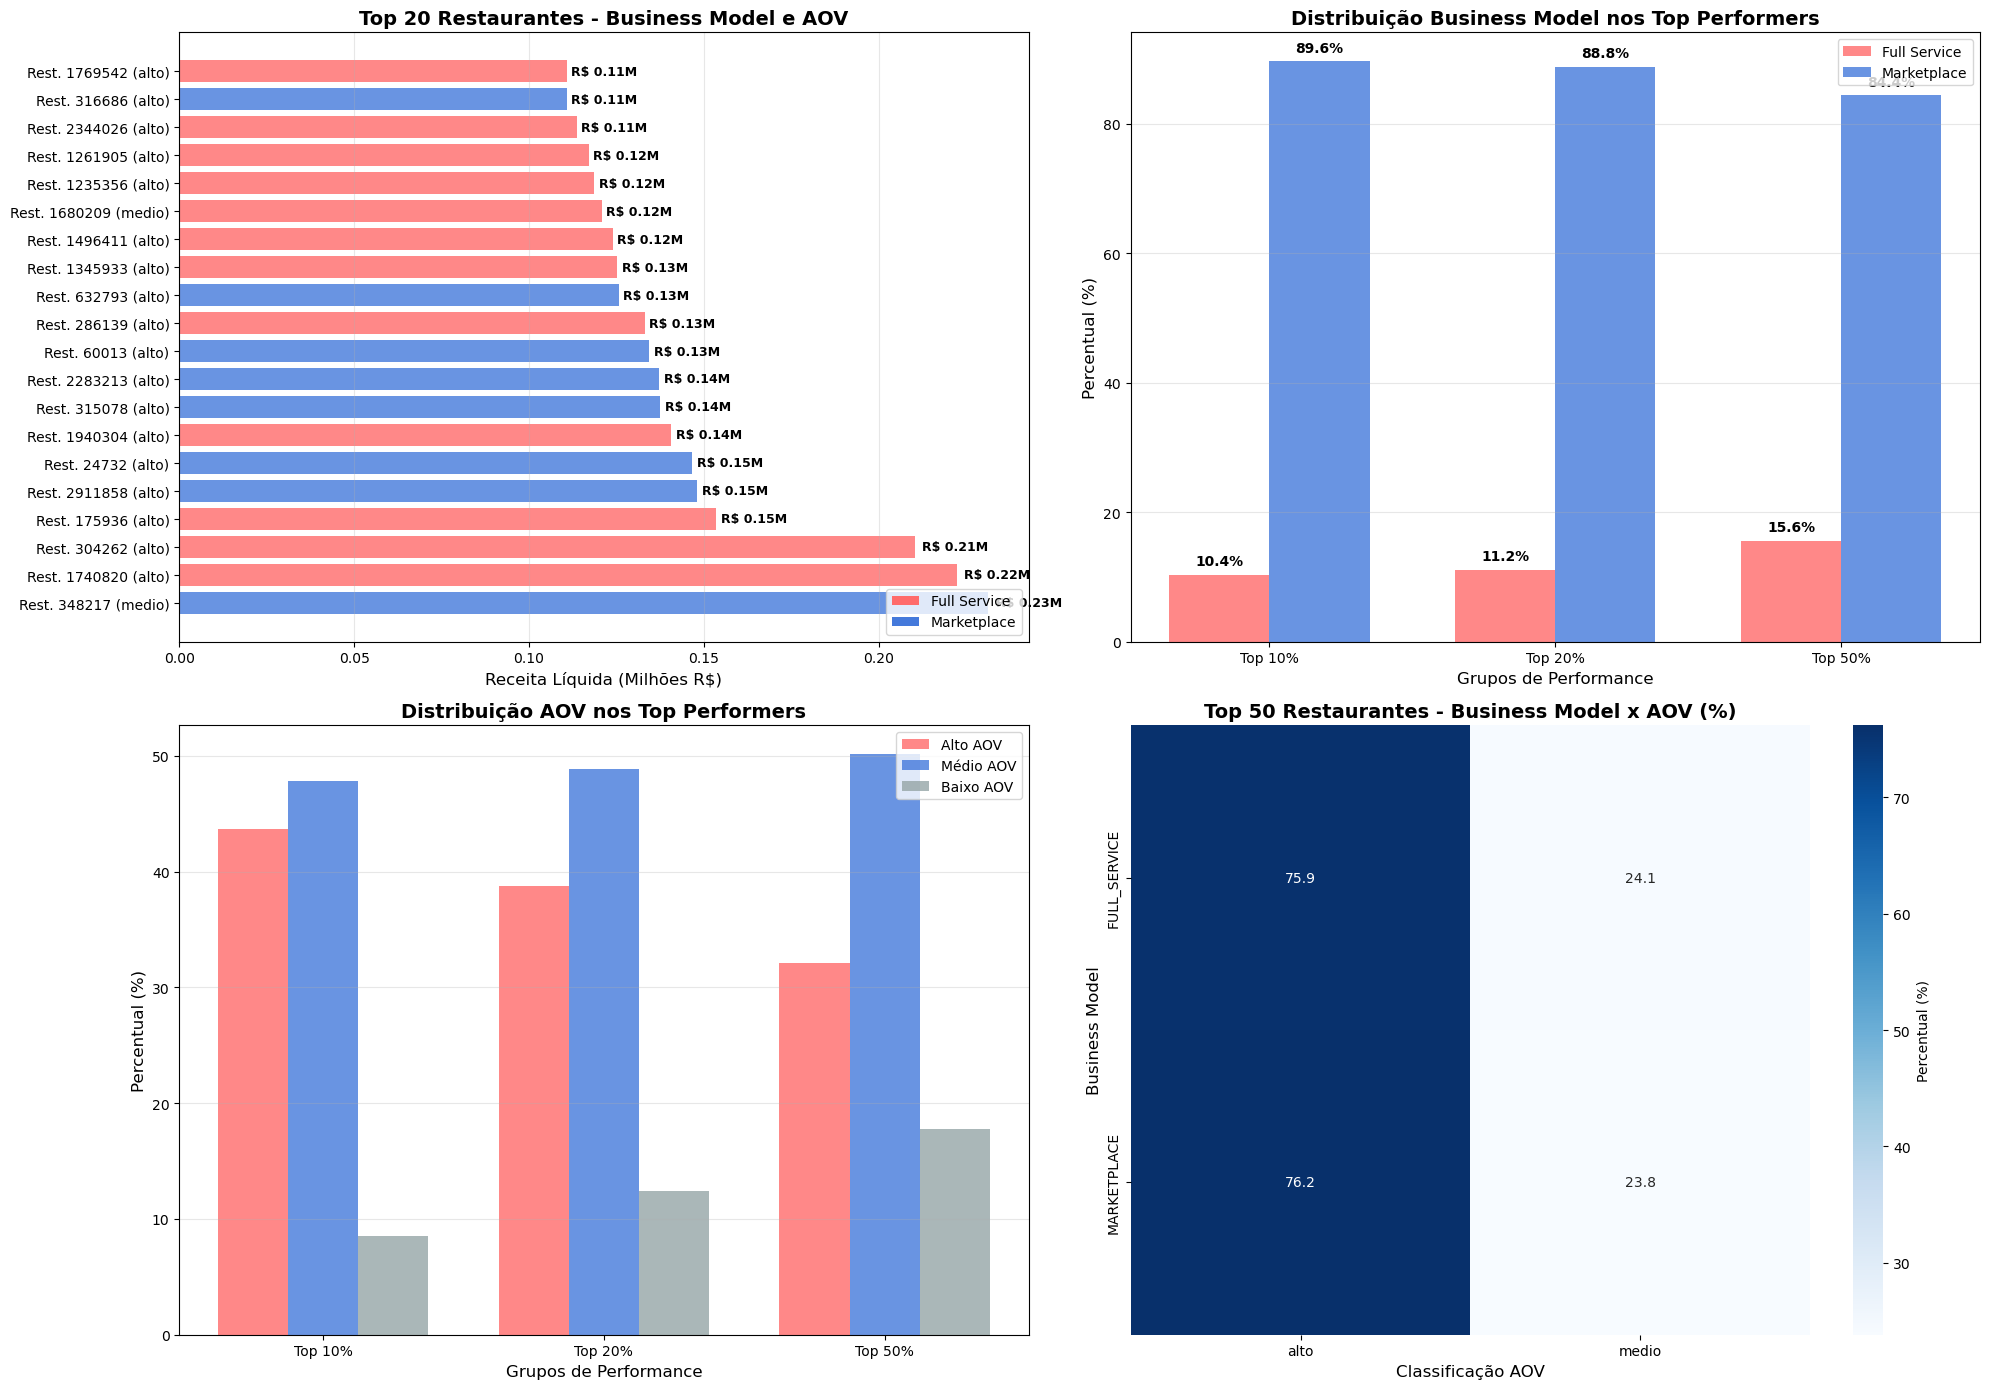

ANÁLISE DOS TOP RESTAURANTES - BUSINESS MODEL E AOV
TOP 10 RESTAURANTES:
----------------------------------------------------------------------
 1º - Rest. 348,217 | MARKETPLACE | AOV MEDIO
     Receita: R$ 231,296.75 (0.15%)
     AOV: R$ 53.62 | Taxa: 10.40% | Pedidos: 26,125

 2º - Rest. 1,740,820 | FULL_SERVICE | AOV ALTO
     Receita: R$ 222,298.73 (0.14%)
     AOV: R$ 64.31 | Taxa: 11.56% | Pedidos: 24,472

 3º - Rest. 304,262 | FULL_SERVICE | AOV ALTO
     Receita: R$ 210,344.64 (0.13%)
     AOV: R$ 69.73 | Taxa: 12.06% | Pedidos: 21,102

 4º - Rest. 175,936 | FULL_SERVICE | AOV ALTO
     Receita: R$ 153,448.10 (0.10%)
     AOV: R$ 112.65 | Taxa: 16.41% | Pedidos: 6,777

 5º - Rest. 2,911,858 | MARKETPLACE | AOV ALTO
     Receita: R$ 148,029.17 (0.09%)
     AOV: R$ 155.93 | Taxa: 9.42% | Pedidos: 5,383

 6º - Rest. 24,732 | MARKETPLACE | AOV ALTO
     Receita: R$ 146,522.45 (0.09%)
     AOV: R$ 112.06 | Taxa: 9.50% | Pedidos: 7,426

 7º - Rest. 1,940,304 | FULL_SERVICE | AOV ALTO

In [20]:
from matplotlib.patches import Patch
taxa_comissao_pct = df['commission'] / df['gmv_basket'] * 100
df['taxa_comissao_pct'] = taxa_comissao_pct.fillna(0)
def analise_top_restaurantes():
    restaurantes_detalhado = df.groupby('frn_id').agg({
        'receita_liquida_ifood': 'sum',
        'business_model': 'first',
        'aov_classificacao': 'first',
        'aov': 'mean',
        'taxa_comissao_pct': 'mean',
        'orders': 'sum',
        'gmv_basket': 'sum'
    }).reset_index()
    restaurantes_detalhado = restaurantes_detalhado.sort_values('receita_liquida_ifood', ascending=False)
    
    restaurantes_detalhado['ranking'] = range(1, len(restaurantes_detalhado) + 1)
    restaurantes_detalhado['contribuicao_pct'] = (
        restaurantes_detalhado['receita_liquida_ifood'] / 
        restaurantes_detalhado['receita_liquida_ifood'].sum() * 100
    )
    
    return restaurantes_detalhado

restaurantes_detalhado = analise_top_restaurantes()

fig, axes = plt.subplots(2, 2, figsize=(20, 14))
ax1 = axes[0, 0]
top_20 = restaurantes_detalhado.head(20)
colors_bm = {'FULL_SERVICE': '#FF6B6B', 'MARKETPLACE': '#4479DB'}
colors = [colors_bm[bm] for bm in top_20['business_model']]

bars = ax1.barh(range(len(top_20)), top_20['receita_liquida_ifood']/1e6, color=colors, alpha=0.8)
labels = [f"Rest. {int(frn_id)} ({aov})" for frn_id, aov in zip(top_20['frn_id'], top_20['aov_classificacao'])]
ax1.set_yticks(range(len(top_20)))
ax1.set_yticklabels(labels, fontsize=10)
ax1.set_xlabel('Receita Líquida (Milhões R$)', fontsize=12)
ax1.set_title('Top 20 Restaurantes - Business Model e AOV', fontsize=14, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)

legend_elements = [Patch(facecolor='#FF6B6B', label='Full Service'),
                   Patch(facecolor='#4479DB', label='Marketplace')]
ax1.legend(handles=legend_elements, loc='lower right')
for i, (bar, receita) in enumerate(zip(bars, top_20['receita_liquida_ifood']/1e6)):
    ax1.text(receita + receita*0.01, bar.get_y() + bar.get_height()/2,
             f'R$ {receita:.2f}M', va='center', fontweight='bold', fontsize=9)
ax2 = axes[0, 1]
percentis = [10, 20, 50]
distribuicao_data = []

for percentil in percentis:
    num_restaurantes = int(len(restaurantes_detalhado) * percentil / 100)
    top_percentil = restaurantes_detalhado.head(num_restaurantes)
    
    dist_bm = top_percentil['business_model'].value_counts(normalize=True) * 100
    distribuicao_data.append({
        'percentil': f'Top {percentil}%',
        'FULL_SERVICE': dist_bm.get('FULL_SERVICE', 0),
        'MARKETPLACE': dist_bm.get('MARKETPLACE', 0)
    })

dist_df = pd.DataFrame(distribuicao_data)
x_pos = range(len(dist_df))
width = 0.35

bars1 = ax2.bar([x - width/2 for x in x_pos], dist_df['FULL_SERVICE'], 
                width, label='Full Service', color='#FF6B6B', alpha=0.8)
bars2 = ax2.bar([x + width/2 for x in x_pos], dist_df['MARKETPLACE'], 
                width, label='Marketplace', color='#4479DB', alpha=0.8)

ax2.set_xlabel('Grupos de Performance', fontsize=12)
ax2.set_ylabel('Percentual (%)', fontsize=12)
ax2.set_title('Distribuição Business Model nos Top Performers', fontsize=14, fontweight='bold')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(dist_df['percentil'])
ax2.legend()
ax2.grid(axis='y', alpha=0.3)
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 1,
                 f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')
ax3 = axes[1, 0]

distribuicao_aov_data = []
for percentil in percentis:
    num_restaurantes = int(len(restaurantes_detalhado) * percentil / 100)
    top_percentil = restaurantes_detalhado.head(num_restaurantes)
    
    dist_aov = top_percentil['aov_classificacao'].value_counts(normalize=True) * 100
    distribuicao_aov_data.append({
        'percentil': f'Top {percentil}%',
        'alto': dist_aov.get('alto', 0),
        'medio': dist_aov.get('medio', 0),
        'baixo': dist_aov.get('baixo', 0)
    })

dist_aov_df = pd.DataFrame(distribuicao_aov_data)
x_pos = range(len(dist_aov_df))
width = 0.25

bars1 = ax3.bar([x - width for x in x_pos], dist_aov_df['alto'], 
                width, label='Alto AOV', color='#FF6B6B', alpha=0.8)
bars2 = ax3.bar(x_pos, dist_aov_df['medio'], 
                width, label='Médio AOV', color='#4479DB', alpha=0.8)
bars3 = ax3.bar([x + width for x in x_pos], dist_aov_df['baixo'], 
                width, label='Baixo AOV', color='#95A5A6', alpha=0.8)

ax3.set_xlabel('Grupos de Performance', fontsize=12)
ax3.set_ylabel('Percentual (%)', fontsize=12)
ax3.set_title('Distribuição AOV nos Top Performers', fontsize=14, fontweight='bold')
ax3.set_xticks(x_pos)
ax3.set_xticklabels(dist_aov_df['percentil'])
ax3.legend()
ax3.grid(axis='y', alpha=0.3)
ax4 = axes[1, 1]
top_50 = restaurantes_detalhado.head(50)
crosstab = pd.crosstab(top_50['business_model'], top_50['aov_classificacao'], normalize='index') * 100

sns.heatmap(crosstab, annot=True, fmt='.1f', cmap='Blues', ax=ax4,
            cbar_kws={'label': 'Percentual (%)'})
ax4.set_title('Top 50 Restaurantes - Business Model x AOV (%)', fontsize=14, fontweight='bold')
ax4.set_xlabel('Classificação AOV', fontsize=12)
ax4.set_ylabel('Business Model', fontsize=12)

plt.tight_layout()
plt.show()

print("ANÁLISE DOS TOP RESTAURANTES - BUSINESS MODEL E AOV")
print("="*70)

print(f"TOP 10 RESTAURANTES:")
print("-" * 70)
top_10 = restaurantes_detalhado.head(10)
for i, row in top_10.iterrows():
    print(f"{row['ranking']:2d}º - Rest. {int(row['frn_id']):,} | {row['business_model']} | AOV {row['aov_classificacao'].upper()}")
    print(f"     Receita: R$ {row['receita_liquida_ifood']:,.2f} ({row['contribuicao_pct']:.2f}%)")
    print(f"     AOV: R$ {row['aov']:.2f} | Taxa: {row['taxa_comissao_pct']:.2f}% | Pedidos: {row['orders']:,}")
    print()

print(f"SEGMENTO ALVO (FS + Alto AOV) NOS TOP PERFORMERS:")
print("-" * 50)
for percentil in [10, 20, 50]:
    num_restaurantes = int(len(restaurantes_detalhado) * percentil / 100)
    top_percentil = restaurantes_detalhado.head(num_restaurantes)
    
    fs_alto_aov = top_percentil[
        (top_percentil['business_model'] == 'FULL_SERVICE') & 
        (top_percentil['aov_classificacao'] == 'alto')
    ]
    
    if len(fs_alto_aov) > 0:
        receita_segmento = fs_alto_aov['receita_liquida_ifood'].sum()
        receita_total_percentil = top_percentil['receita_liquida_ifood'].sum()
        participacao = (receita_segmento / receita_total_percentil) * 100
        
        print(f"Top {percentil}% ({num_restaurantes} restaurantes):")
        print(f"  FS + Alto AOV: {len(fs_alto_aov)} restaurantes ({len(fs_alto_aov)/num_restaurantes*100:.1f}%)")
        print(f"  Receita do segmento: R$ {receita_segmento:,.2f}")
        print(f"  Participação no top {percentil}%: {participacao:.1f}%")
        print(f"  Taxa média de comissão: {fs_alto_aov['taxa_comissao_pct'].mean():.2f}%")
        print()

print(f"💡 INSIGHTS ESTRATÉGICOS:")
print("   • Concentração do segmento alvo nos top performers")
print("   • Oportunidade de redução seletiva de comissão")
print("   • Foco nos restaurantes de maior impacto")
print("   • Potencial de migração Marketplace → FS")




In [21]:
total_restaurantes = len(restaurantes_detalhado)
fs_count = len(restaurantes_detalhado[restaurantes_detalhado['business_model'] == 'FULL_SERVICE'])
marketplace_count = len(restaurantes_detalhado[restaurantes_detalhado['business_model'] == 'MARKETPLACE'])

print(f"Total de Restaurantes: {total_restaurantes}")
print(f"Restaurantes Full Service: {fs_count} ({fs_count/total_restaurantes*100:.1f}%)")
print(f"Restaurantes Marketplace: {marketplace_count} ({marketplace_count/total_restaurantes*100:.1f}%)")

Total de Restaurantes: 49276
Restaurantes Full Service: 14444 (29.3%)
Restaurantes Marketplace: 34832 (70.7%)


In [22]:
top_20_restaurantes = restaurantes_detalhado.head(20)
fs_top_20_count = len(top_20_restaurantes[top_20_restaurantes['business_model'] == 'FULL_SERVICE'])
marketplace_top_20_count = len(top_20_restaurantes[top_20_restaurantes['business_model'] == 'MARKETPLACE'])

print(f"Top 20 Restaurantes - Full Service: {fs_top_20_count} ({fs_top_20_count/20*100:.1f}%)")
print(f"Top 20 Restaurantes - Marketplace: {marketplace_top_20_count} ({marketplace_top_20_count/20*100:.1f}%)")
fs_top_50_count = len(restaurantes_detalhado.head(50)[restaurantes_detalhado['business_model'] == 'FULL_SERVICE'])
marketplace_top_50_count = len(restaurantes_detalhado.head(50)[restaurantes_detalhado['business_model'] == 'MARKETPLACE'])

print(f"Top 50 Restaurantes - Full Service: {fs_top_50_count} ({fs_top_50_count/50*100:.1f}%)")
print(f"Top 50 Restaurantes - Marketplace: {marketplace_top_50_count} ({marketplace_top_50_count/50*100:.1f}%)")


Top 20 Restaurantes - Full Service: 12 (60.0%)
Top 20 Restaurantes - Marketplace: 8 (40.0%)
Top 50 Restaurantes - Full Service: 29 (58.0%)
Top 50 Restaurantes - Marketplace: 21 (42.0%)


C:\Users\Beatriz\AppData\Local\Temp\ipykernel_5812\1996324903.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fs_top_50_count = len(restaurantes_detalhado.head(50)[restaurantes_detalhado['business_model'] == 'FULL_SERVICE'])
C:\Users\Beatriz\AppData\Local\Temp\ipykernel_5812\1996324903.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  marketplace_top_50_count = len(restaurantes_detalhado.head(50)[restaurantes_detalhado['business_model'] == 'MARKETPLACE'])


In [23]:
def analise_sazonalidade():
    df['mes'] = df['reference_month'].dt.month
    df['semana'] = df['reference_month'].dt.isocalendar().week
    
    sazonalidade_mensal = df.groupby('mes').agg({
        'receita_liquida_ifood': 'mean',
        'orders': 'mean',
        'aov': 'mean'
    })
    
    return sazonalidade_mensal

def benchmark_comissao():
    benchmark = df.groupby(['business_model', 'aov_classificacao']).agg({
        'taxa_comissao_pct': ['mean', 'median', 'std', 'min', 'max'],
        'receita_liquida_ifood': 'sum'
    }).round(2)
    
    return benchmark
  
print("ANÁLISE DE SAZONALIDADE E BENCHMARK DE COMISSÃO")
print("="*70)
sazonalidade_mensal = analise_sazonalidade()
benchmark = benchmark_comissao()

print("Sazonalidade Mensal:")
print(sazonalidade_mensal)

print("\nBenchmark de Taxa de Comissão por Categoria:")
print(benchmark)

ANÁLISE DE SAZONALIDADE E BENCHMARK DE COMISSÃO
Sazonalidade Mensal:
     receita_liquida_ifood      orders        aov
mes                                              
8              1219.448140  129.560138  48.064348
9              1217.716814  131.177169  48.054294
10             1215.104747  130.500149  48.211780

Benchmark de Taxa de Comissão por Categoria:
                                 taxa_comissao_pct                           \
                                              mean median   std  min    max   
business_model aov_classificacao                                              
FULL_SERVICE   alto                          17.37  19.85  6.48  0.0  23.01   
               baixo                         16.00  18.45  6.86  0.0  23.04   
               medio                         15.66  18.64  7.47  0.0  23.01   
MARKETPLACE    alto                           9.80  10.69  2.58  0.0  18.37   
               baixo                          9.32  10.36  2.89  0.0  12.03   
   

In [24]:
def analise_churn_risk():
    restaurantes_temporal = df.groupby(['frn_id', 'reference_month']).agg({
        'orders': 'sum',
        'receita_liquida_ifood': 'sum'
    }).reset_index()
    
    restaurantes_temporal['growth_orders'] = restaurantes_temporal.groupby('frn_id')['orders'].pct_change()
    
    churn_risk = restaurantes_temporal[restaurantes_temporal['growth_orders'] < -0.3]
    
    return churn_risk
  
churn_risk = analise_churn_risk()

print("\nANÁLISE DE RISCO DE CHURN:")
print("="*70)
if churn_risk.empty:
    print("Nenhum restaurante identificado com risco de churn significativo.")
else:
    print(f"Restaurantes com risco de churn (queda > 30% em pedidos): {len(churn_risk['frn_id'].unique())}")
    print(churn_risk[['frn_id', 'reference_month', 'orders']].head(10))


ANÁLISE DE RISCO DE CHURN:
Restaurantes com risco de churn (queda > 30% em pedidos): 14639
     frn_id reference_month  orders
59    27313      2024-09-01       1
77    27523      2024-09-01      48
86    28433      2024-09-01      38
92    29069      2024-09-01     181
135   33537      2024-10-01      39
184   48215      2024-10-01     254
205   50078      2024-09-01     589
206   50078      2024-10-01     372
208   50802      2024-09-01      23
217   51492      2024-09-01      62


In [25]:
def analise_competitiva():
    comparacao = df.groupby(['aov_classificacao', 'business_model']).agg({
        'taxa_comissao_pct': 'mean',
        'orders': 'mean',
        'receita_liquida_ifood': 'mean',
        'margem_percentual': 'mean'
    })
    
    return comparacao
  
comparacao = analise_competitiva()

print("\nANÁLISE COMPARATIVA - FS vs Marketplace:")
print("="*70)
print(comparacao)


ANÁLISE COMPARATIVA - FS vs Marketplace:
                                  taxa_comissao_pct      orders  \
aov_classificacao business_model                                  
alto              FULL_SERVICE            17.374768  108.956864   
                  MARKETPLACE              9.801462  140.856360   
baixo             FULL_SERVICE            16.002301   57.303968   
                  MARKETPLACE              9.322220  164.635957   
medio             FULL_SERVICE            15.664218   79.785161   
                  MARKETPLACE              9.279067  151.998514   

                                  receita_liquida_ifood  margem_percentual  
aov_classificacao business_model                                            
alto              FULL_SERVICE              1456.992897          52.997247  
                  MARKETPLACE               2091.211556          97.968546  
baixo             FULL_SERVICE               180.722285          27.025523  
                  MARKETPLACE       

In [26]:
total_receita_comissao = df['commission'].sum()
print(f"Receita total de comissões: R$ {total_receita_comissao:,.2f}")
total_receita_comissao_fs = df[df['business_model'] == 'FULL_SERVICE']['commission'].sum()
total_receita_comissao_mp = df[df['business_model'] == 'MARKETPLACE']['commission'].sum()

print(f"Receita de comissões - Full Service: R$ {total_receita_comissao_fs:,.2f} ({total_receita_comissao_fs/total_receita_comissao*100:.1f}%)")
print(f"Receita de comissões - Marketplace: R$ {total_receita_comissao_mp:,.2f} ({total_receita_comissao_mp/total_receita_comissao*100:.1f}%)")

Receita total de comissões: R$ 93,027,869.86
Receita de comissões - Full Service: R$ 21,162,183.80 (22.7%)
Receita de comissões - Marketplace: R$ 71,865,686.06 (77.3%)
